In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
zomato_file=pd.read_csv('zomato.csv')

In [4]:
country_code=pd.read_excel('Country-Code.xlsx')

In [5]:
zomato_file

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,?stanbul,"Kemanke? Karamustafa Pa?a Mahallesi, R?ht?m Ca...",Karak?y,"Karak?y, ?stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A?ac?,208,?stanbul,"Ko?uyolu Mahallesi, Muhittin ?st?nda? Caddesi,...",Ko?uyolu,"Ko?uyolu, ?stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,?stanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, ?stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A??k Kahve,208,?stanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, ?stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [7]:
zomato_df=pd.merge(zomato_file,country_code,on='Country Code',how='left')

In [8]:
zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,?stanbul,"Kemanke? Karamustafa Pa?a Mahallesi, R?ht?m Ca...",Karak?y,"Karak?y, ?stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A?ac?,208,?stanbul,"Ko?uyolu Mahallesi, Muhittin ?st?nda? Caddesi,...",Ko?uyolu,"Ko?uyolu, ?stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,?stanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, ?stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A??k Kahve,208,?stanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, ?stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [9]:
# checking for no of tuples and features
zomato_df.shape

(9551, 22)

In [10]:
print('total number of records are {} and total number of features are{}'.format(zomato_df.shape[0],zomato_df.shape[1]))

total number of records are 9551 and total number of features are22


In [11]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
zomato_df.duplicated().sum()

0

In [ ]:
# Here we have checked for duplicates values and luckily we dont have any duplicate value

In [10]:
# checking for the frequency count of unique values in each feature 
zomato_df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [13]:
zomato_df.drop('Switch to order menu',axis=1,inplace=True)

In [14]:
zomato_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [ ]:
                    #checking for null values

In [13]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [ ]:
# here from the above information we conclude that luckily we dont have any missing  values in the the features in the dataset

<Axes: >

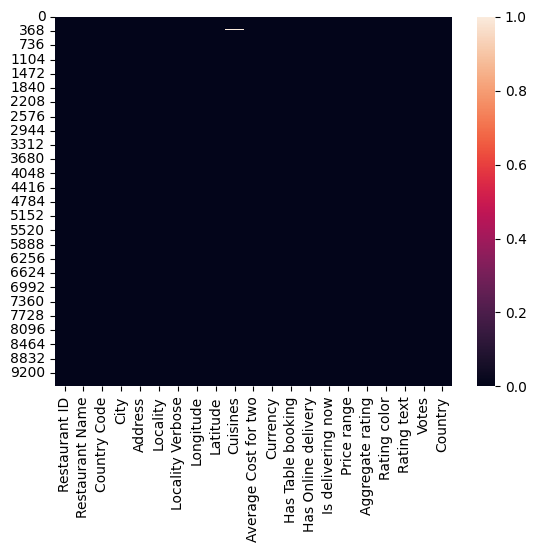

In [89]:
sns.heatmap(zomato_df.isnull())

In [ ]:
# color coding  is same in the heatmap so it is confirmed that there is no missing values prsesent in the dataset

In [ ]:
                                    Univariate Analysis

<Axes: xlabel='Country Code', ylabel='count'>

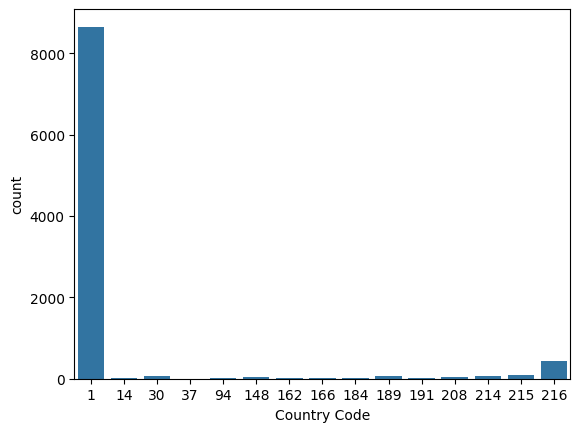

In [139]:
sns.countplot(x='Country Code',data=zomato_df)

<Axes: xlabel='Price range', ylabel='count'>

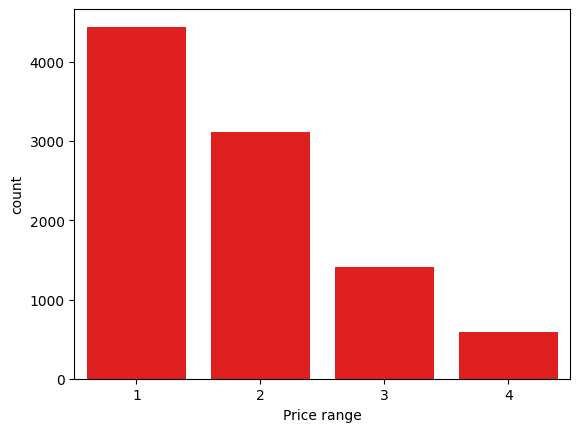

In [140]:
sns.countplot(x='Price range',data=zomato_df,color='red')

In [ ]:
# we conclude that the price range 1 is highest count followed by price range 2 and also we noticed that all the price range are decreasing in order

<Axes: xlabel='Currency', ylabel='count'>

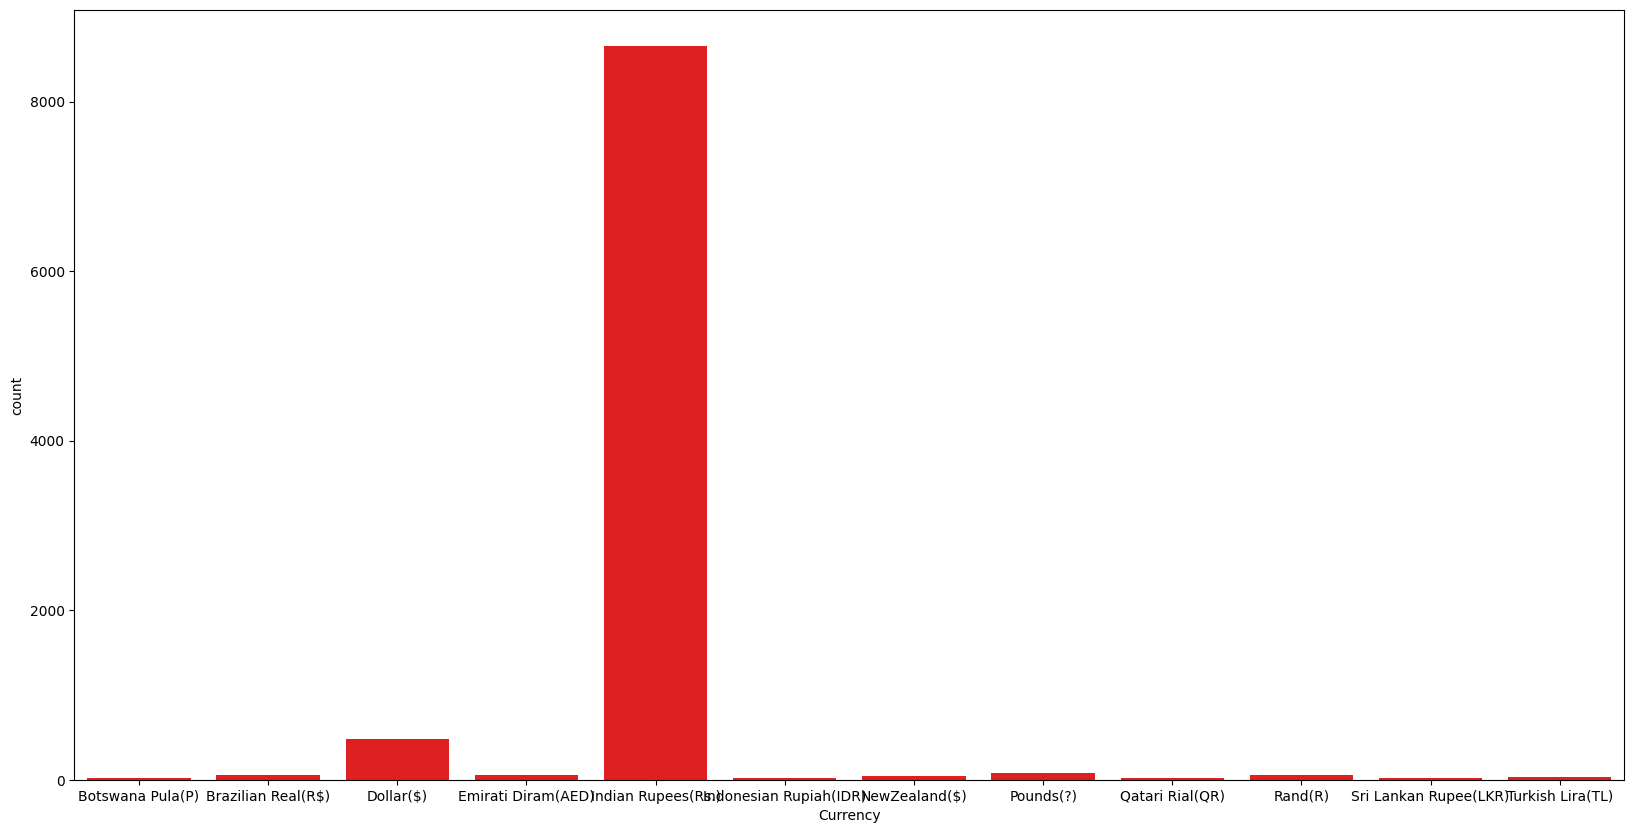

In [141]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Currency',data=zomato_df,color='red')

In [ ]:
# from the above observation we conclude that Indian currency rupees is most used currency as compared to other currency.It means the zomato has main buisness in india followed by dollor.
# zomato doesnt functioning well in other countries as per the above insights 

Text(0.5, 1.0, ' Frequency count of Table booking')

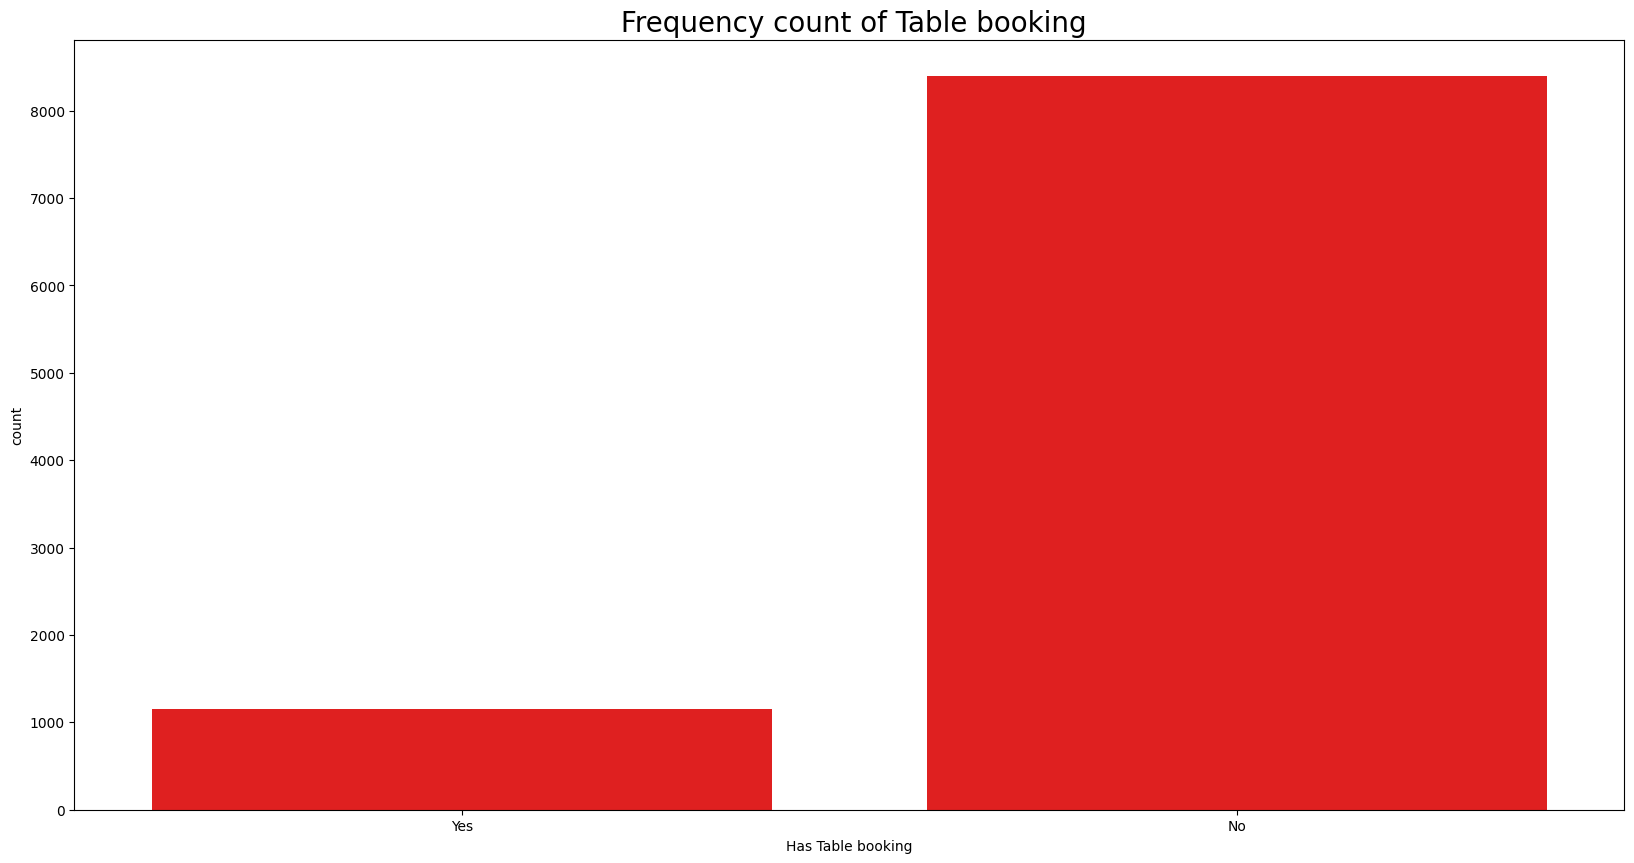

In [41]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Has Table booking',data=zomato_df,color='red')
ax.set_title(' Frequency count of Table booking',fontsize=20)

Text(0.5, 1.0, ' Frequency count of Online delivery')

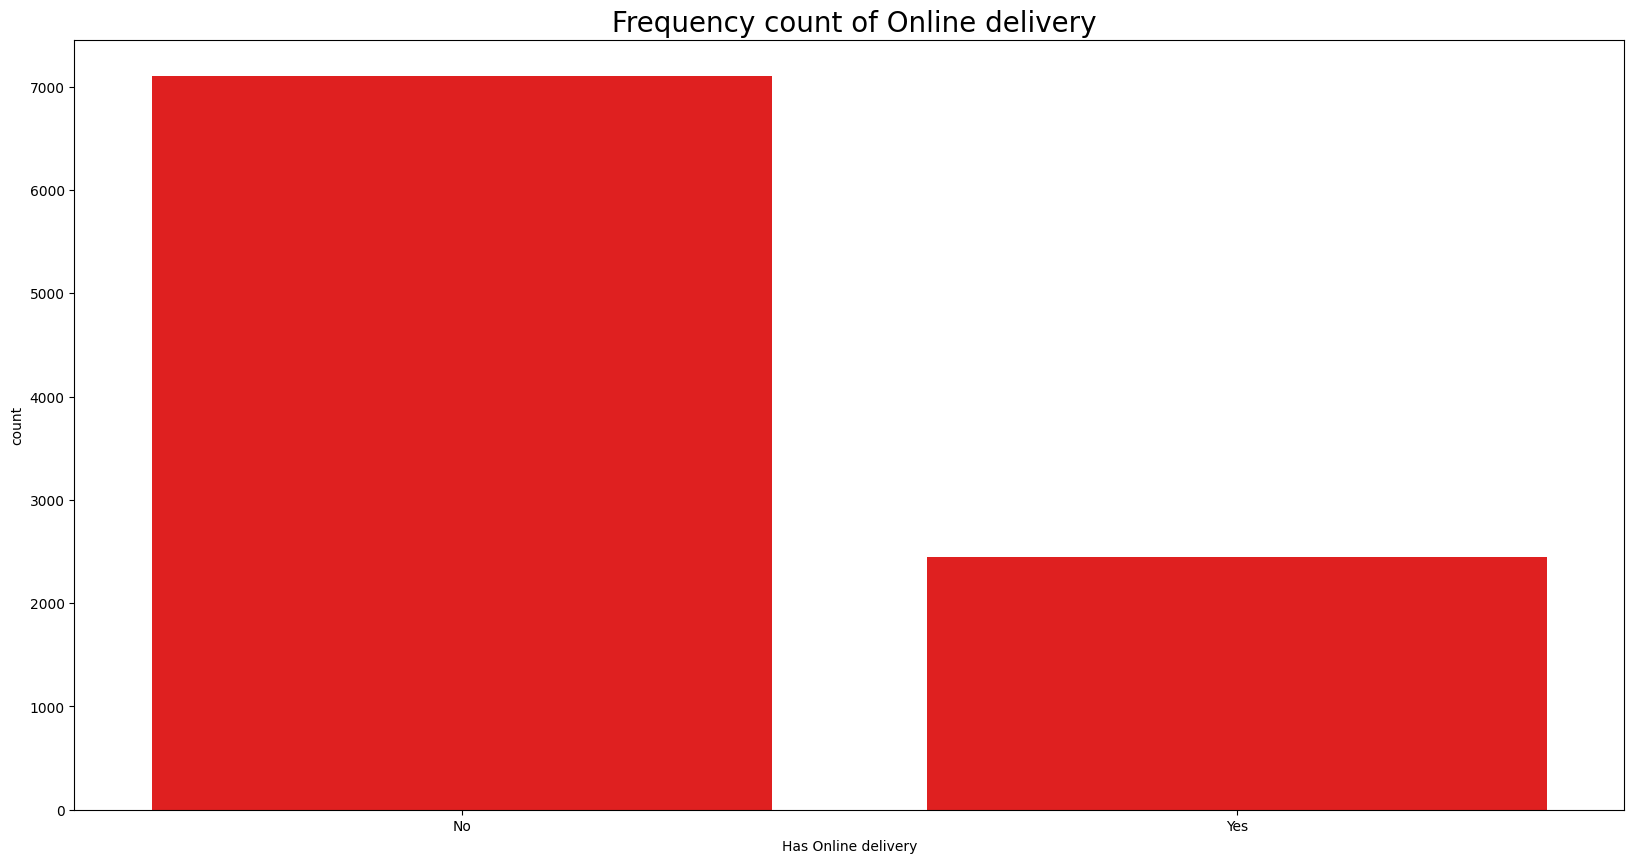

In [42]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Has Online delivery',data=zomato_df,color='red')
ax.set_title(' Frequency count of Online delivery',fontsize=20)

In [ ]:
# we conclude that in most of the places zomato online delivery is not available but in few palces they availed their service

In [61]:
countries=zomato_df[zomato_df['Has Online delivery'] =='Yes'].Country.value_counts()


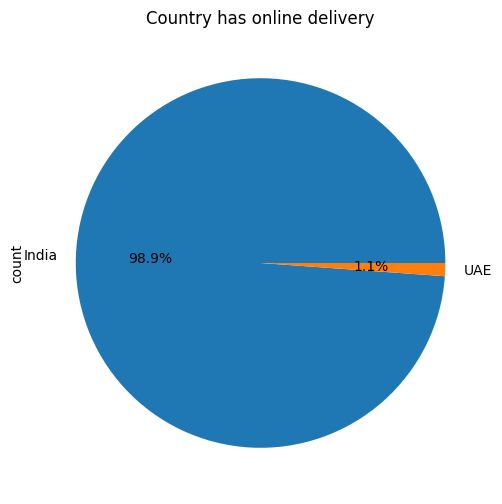

In [63]:
fig,ax=plt.subplots(figsize=(10,6))
countries.plot.pie(autopct = '%1.1f%%')
plt.title('Country has online delivery')
plt.show()


In [ ]:
# from the  above observation we conclude zomato has avialed their online delivery services only in the country India (98.9%)and UAE(1.1%)

Text(0.5, 1.0, ' Frequency count of Is delivering now')

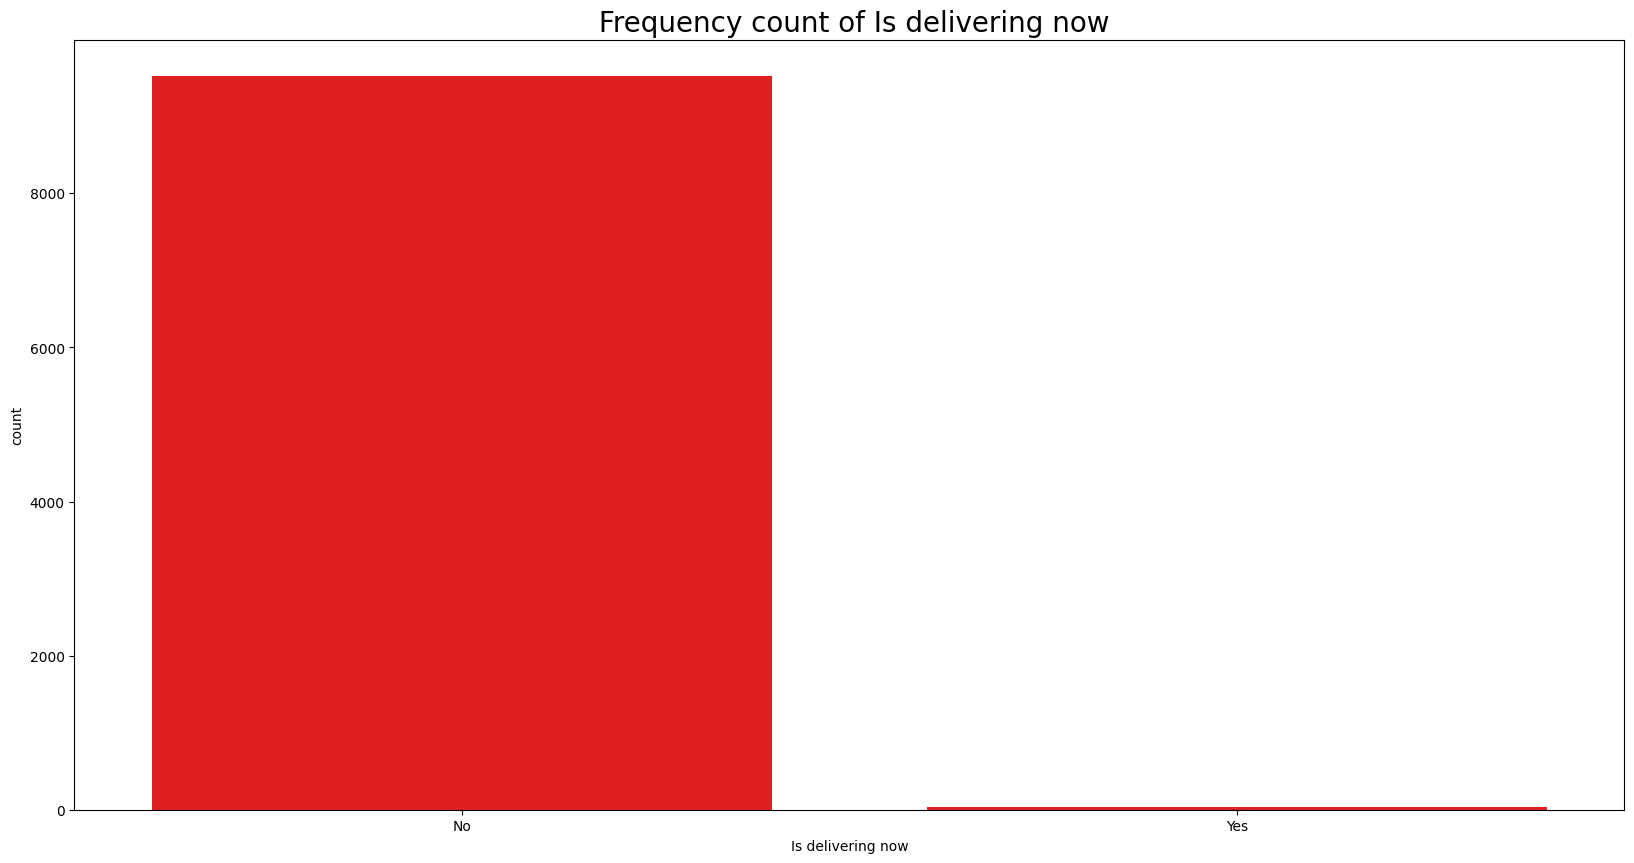

In [64]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Is delivering now',data=zomato_df,color='red')
ax.set_title(' Frequency count of Is delivering now',fontsize=20)

In [ ]:
#from the above information we conclude that zomato have not availed delivering now facility in most of the places  

Text(0.5, 1.0, ' Frequency count of Aggregate rating')

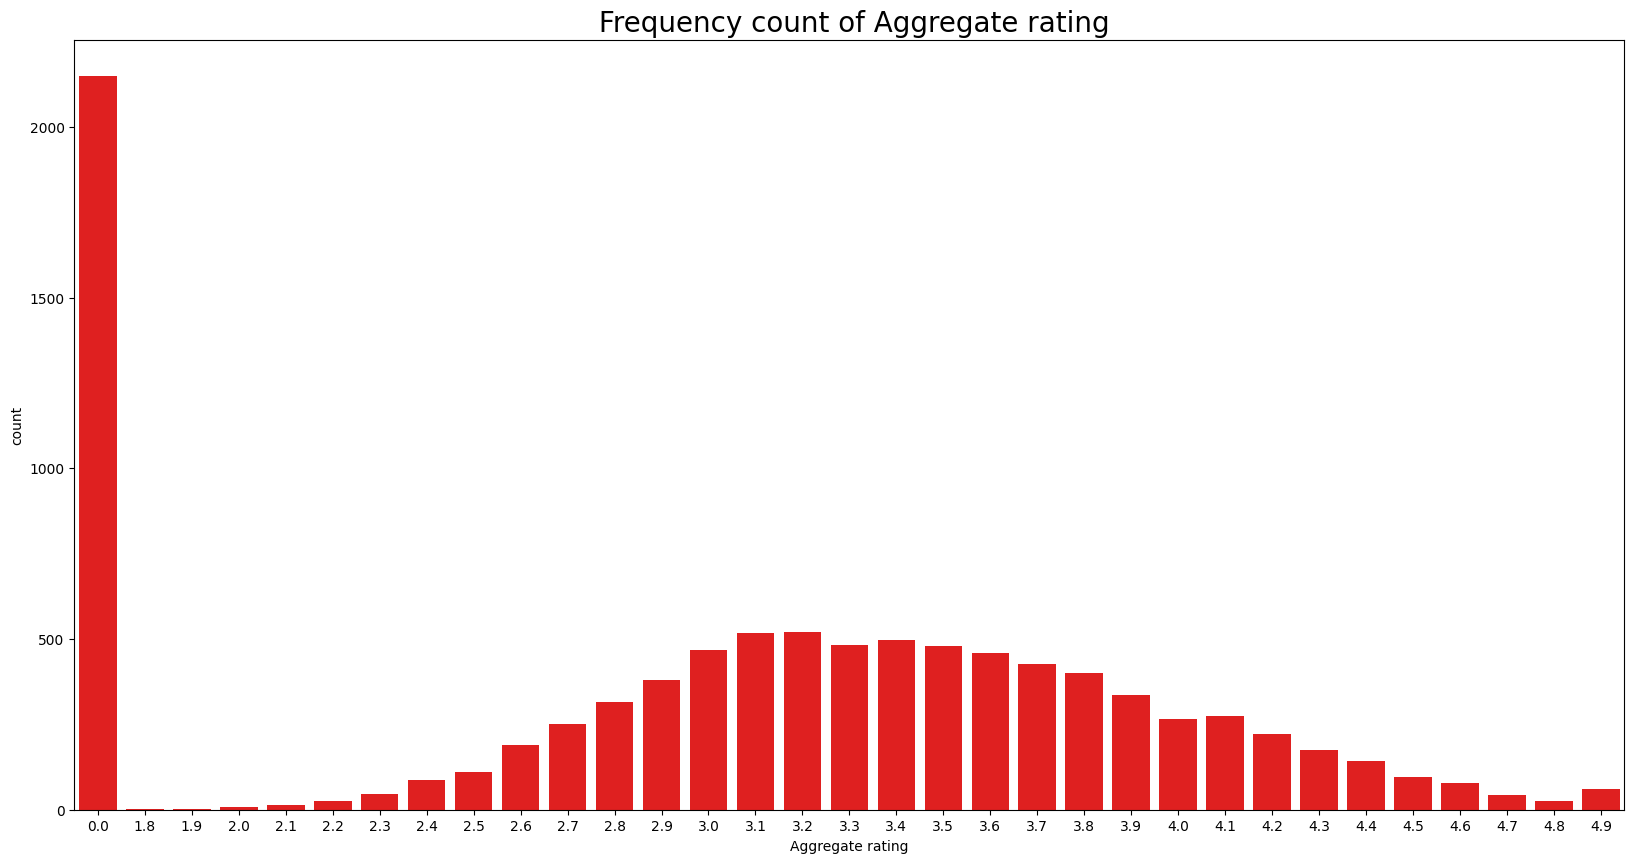

In [65]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Aggregate rating',data=zomato_df,color='red')
ax.set_title(' Frequency count of Aggregate rating',fontsize=20)

In [ ]:
# from above observation we conclude that most of the customer has given 0.0 as average rating to the zomato service and food quality
and 3.1 and 3.2 are the highest average rating after 0.0 rating given by customer

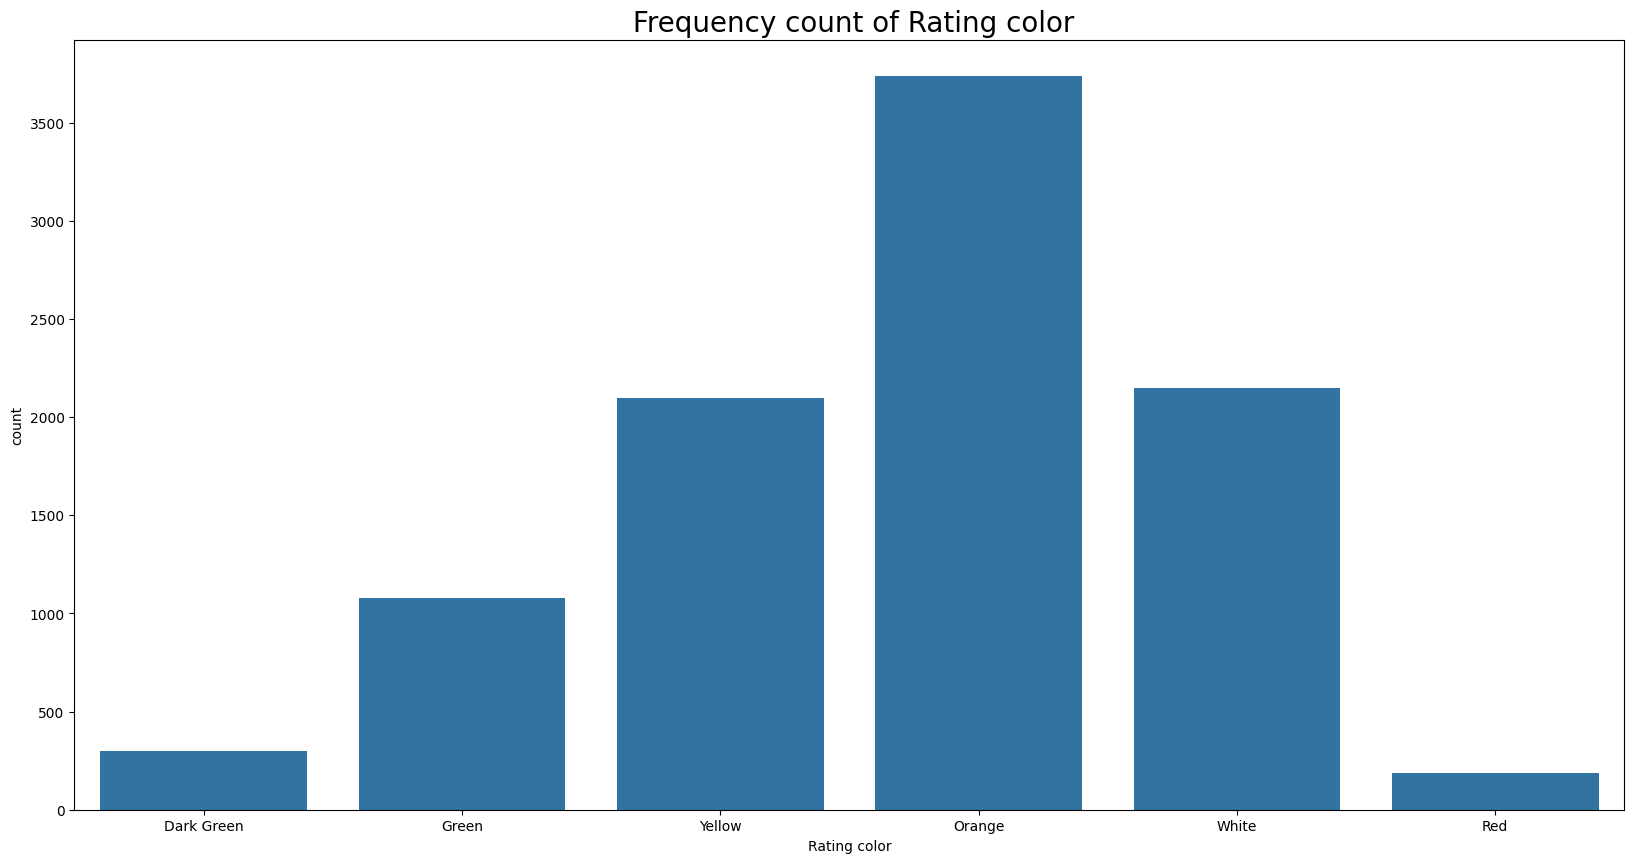

In [68]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Rating color',data=zomato_df)
ax.set_title(' Frequency count of Rating color',fontsize=20)
plt.show()

In [17]:
# checking for  top 10 Cuisine
cuisin_val=zomato_df.Cuisines.value_counts().values
cuisin_label = zomato_df.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x1d644f53cd0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

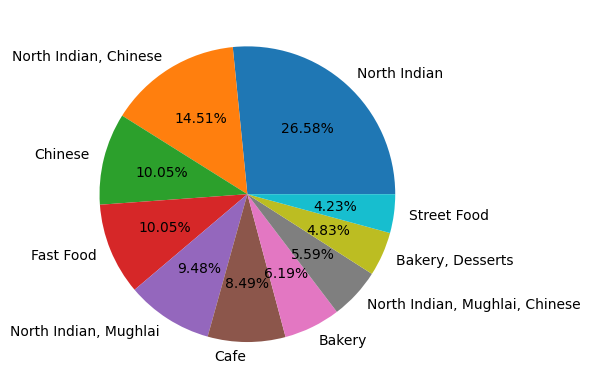

In [18]:
plt.pie(cuisin_val[:10],labels=cuisin_label[:10],autopct='%1.2f%%')

In [ ]:
# We conclude that 26.58% people or customers like to eat north Indian cuisine followed by Chinese.
#These are the top 10 Cuisine like by customes.

([<matplotlib.patches.Wedge at 0x1d6469d3cd0>,
 [Text(0.9991203655099928, 0.4601722451682397, 'Connaught Place'),
  Text(0.38474210036716133, 1.0305209926076544, 'Rajouri Garden'),
  Text(-0.32582401454474796, 1.050637288290276, 'Shahdara'),
  Text(-0.8703141347024715, 0.6727208239211033, 'Defence Colony'),
  Text(-1.0984514781151833, 0.05834680990910352, 'Malviya Nagar'),
  Text(-0.9387165856946939, -0.5734205888714641, 'Pitampura'),
  Text(-0.4530913540453708, -1.0023513480258968, 'Mayur Vihar Phase 1'),
  Text(0.17438376636990302, -1.0860894539708261, 'Rajinder Nagar'),
  Text(0.7325666148603296, -0.8205767208446006, 'Safdarjung'),
  Text(1.0573163253689466, -0.30345047060156, 'Satyaniketan')],
 [Text(0.5449747448236324, 0.2510030428190398, '13.74%'),
  Text(0.20985932747299707, 0.5621023596041751, '11.15%'),
  Text(-0.1777221897516807, 0.5730748845219685, '9.80%'),
  Text(-0.4747168007468026, 0.3669386312296927, '9.68%'),
  Text(-0.5991553516991909, 0.03182553267769282, '9.57%'),
 

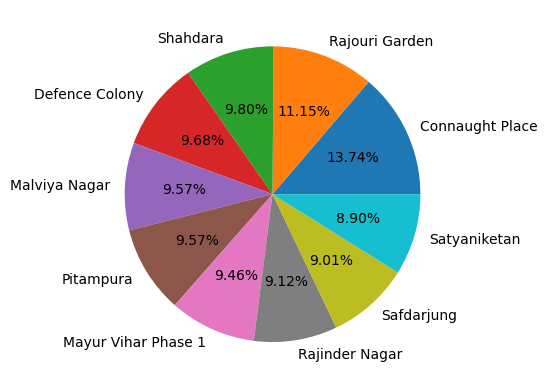

In [23]:
# checking for  top 10 location
val=zomato_df.Locality.value_counts().values
label = zomato_df.Locality.value_counts().index
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')


In [ ]:
# These are the top 10 place where most of zomato restaurant are located.
# out of which Connaught Place is top among the others it has 13.74% restaurant in it place followed by Rajouri Graden.


                                        BIVARATE ANALYSIS

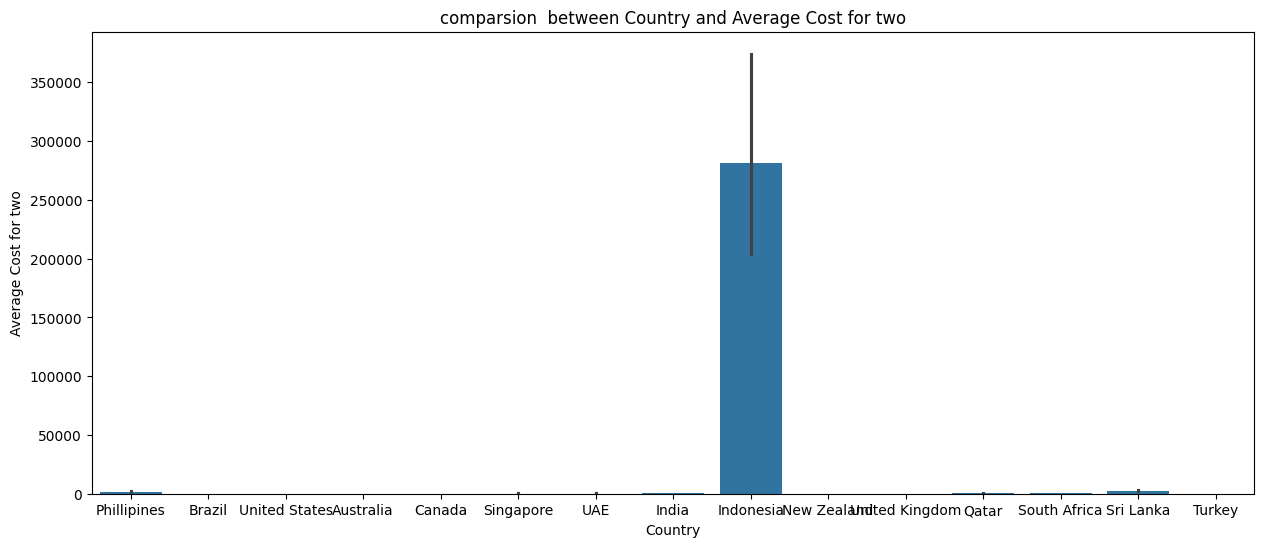

In [29]:
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x="Country",y="Average Cost for two",data=zomato_df)
ax.set_title('comparsion  between Country and Average Cost for two')
plt.show()


In [ ]:
#We can see here Indonesia has high Average cost for two people . It means that Indonesia has high cost of foods  than others.
#Rest of all other countries are  having low average cost for two people


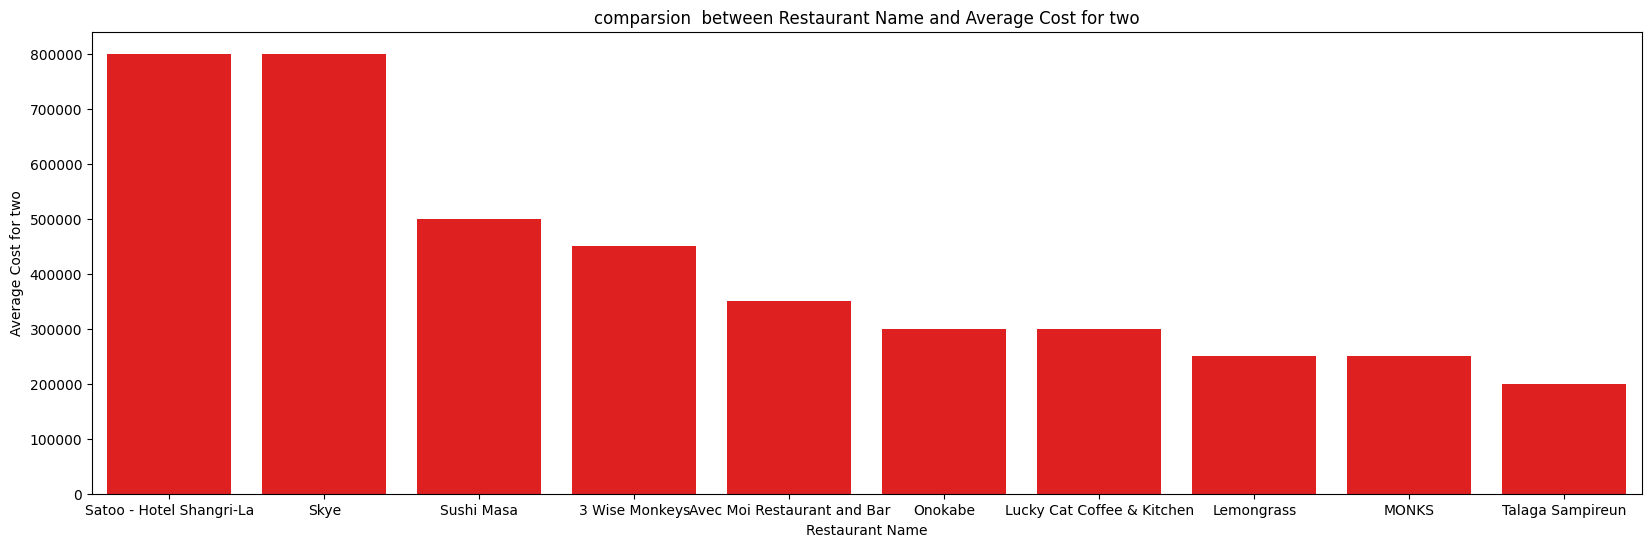

In [37]:
fig,ax=plt.subplots(figsize=(20,6))
Restaurant_good = zomato_df.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=Restaurant_good.iloc[0:10],color='red')
ax.set_title('comparsion  between Restaurant Name and Average Cost for two')
plt.show()


In [ ]:
# we conclude that there are  top 10 restaurant name where average cost for two is low than others.
#Among  which Satoo hotel has high average cost for two followed by Skye.

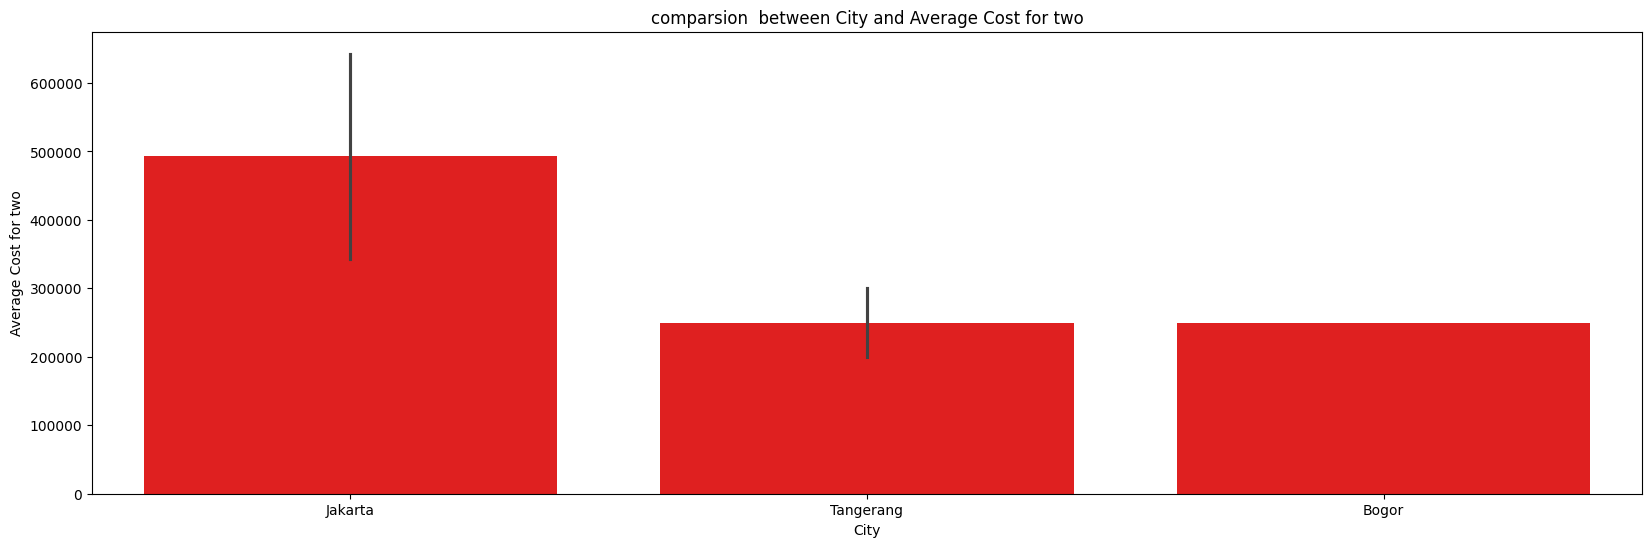

In [39]:
fig,ax=plt.subplots(figsize=(20,6))
Restaurant_city = zomato_df.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="City",y="Average Cost for two",data=Restaurant_city.iloc[0:10],color='red')
ax.set_title('comparsion  between City and Average Cost for two')
plt.show()


In [ ]:
# we conclude that there  are top cities where has high average cost for two in which Jakartha is in to followed by Tangerang.

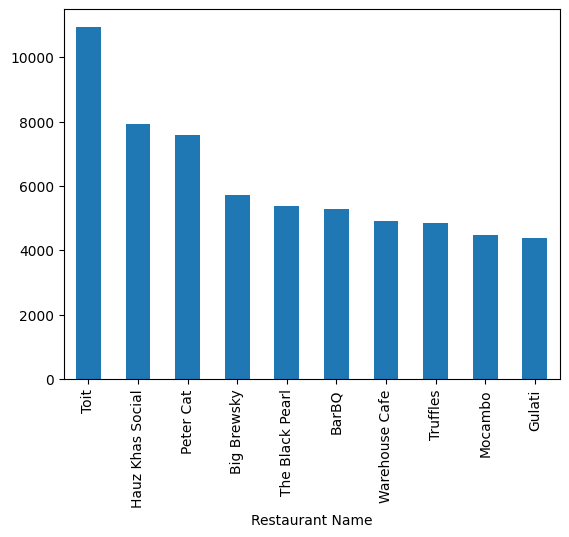

In [42]:
# plotting for restaurant name along with correspnding votes
# use nlargest() method of pandas which is used to return n number of highest value in the column
zomato_df.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()

In [ ]:
# we conclude that there are  top 10 reaturant on the  basis of the customers votes.
#Toit is top restaurant among the others who have top votes followed by Hauz Khas.


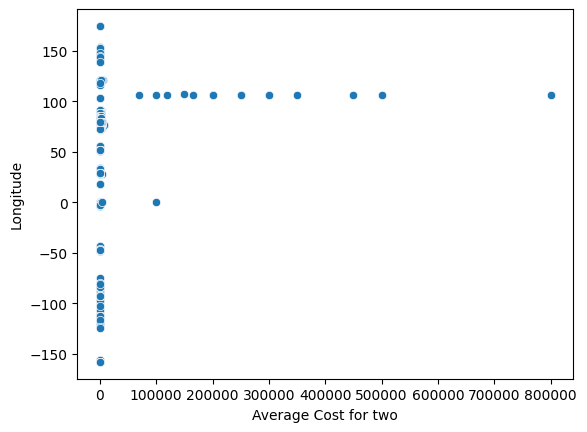

In [43]:
sns.scatterplot(x='Average Cost for two',y='Longitude',data=zomato_df)
plt.show()

In [ ]:
# here we have seen that there is no linear relationship exist between  the features 
# Most of the reaturant are above 50 longitude in the plot

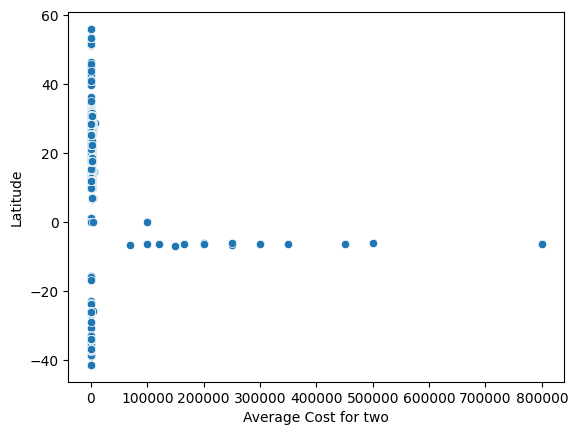

In [44]:
sns.scatterplot(x='Average Cost for two',y='Latitude',data=zomato_df)
plt.show()


In [ ]:
# here we have seen that there is no linear relationship exist between  the features just like longitude

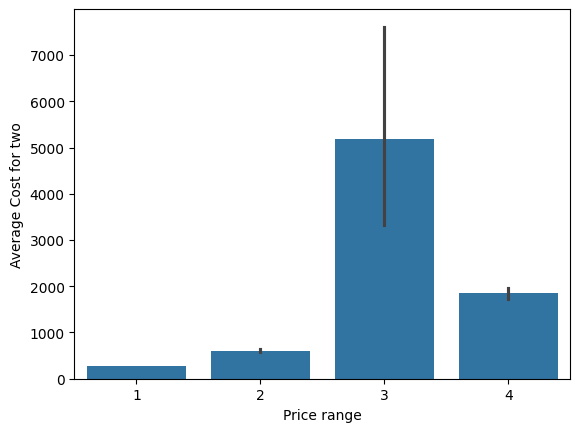

In [45]:
sns.barplot(x='Price range',y='Average Cost for two',data=zomato_df)
plt.show()


In [ ]:
#Many restaurant are having as price range 3 it means that they are also having high average price range.
# price range is  directly proportional to average cost for two . price range increase average cost for two will also increases


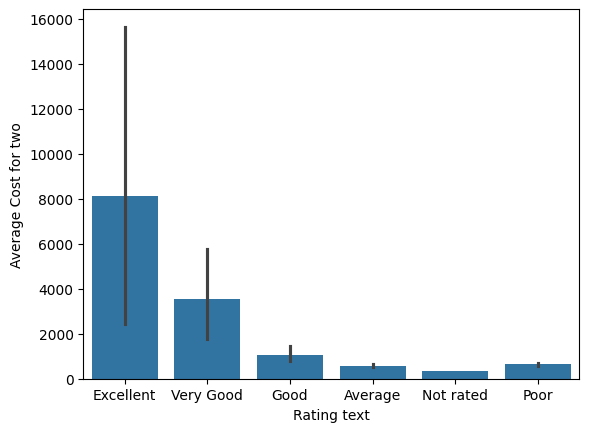

In [47]:
sns.barplot(x='Rating text',y='Average Cost for two',data=zomato_df)
plt.show()


In [ ]:
# Here we conclude that Rating text Excellent is highest count and it is also directly proportional to average cost for two .
# If any restauant has rating text Excellent it means average price for two  will be also high  for that restaurant

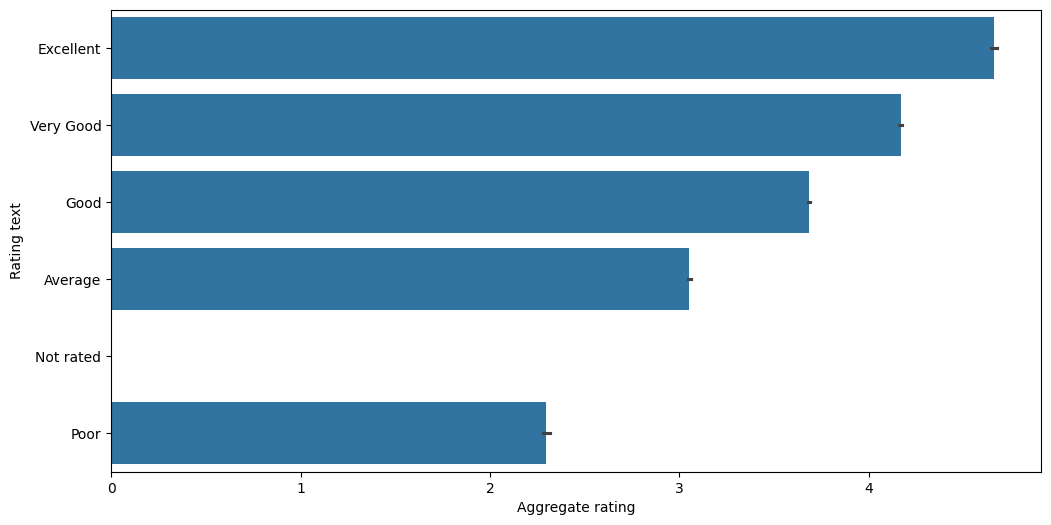

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating text',data=zomato_df)
plt.show()


In [ ]:
#We can conclude that  Many restaurant are having  Rating text Excellent  and their Aggregate rating is also high it mean Aggregrate rating is more than 4.5.
#Similarly, Rating text is depending upon the aggregate rating the restaurant who is  having good rating thier rating text will be  also good.


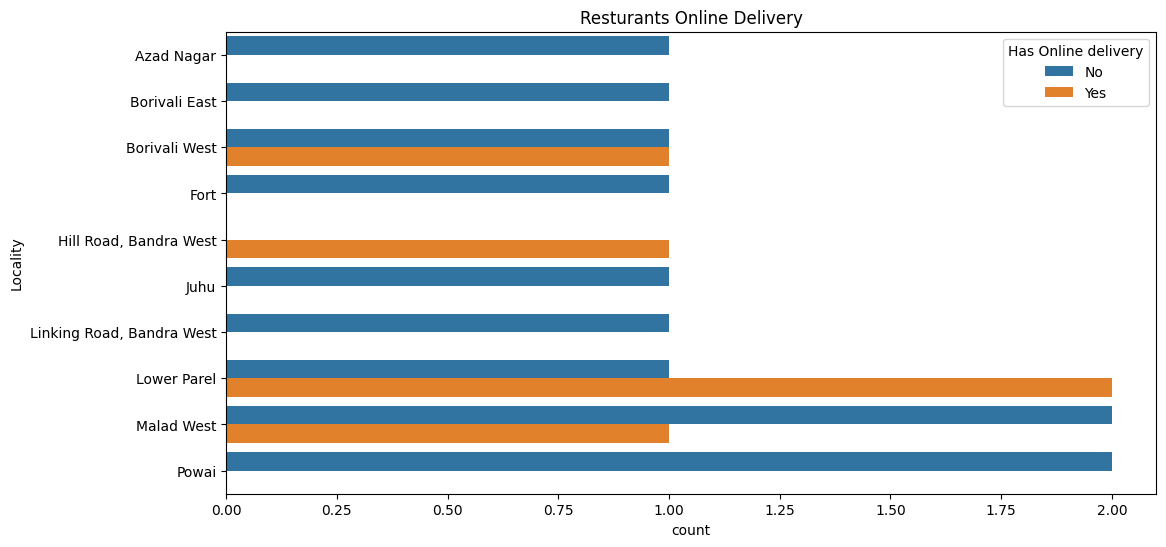

In [142]:
Mumbai = zomato_df[(zomato_df.City == 'Mumbai')]
top_locality = Mumbai.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(y= "Locality", hue="Has Online delivery", data=Mumbai[Mumbai.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')
plt.show()


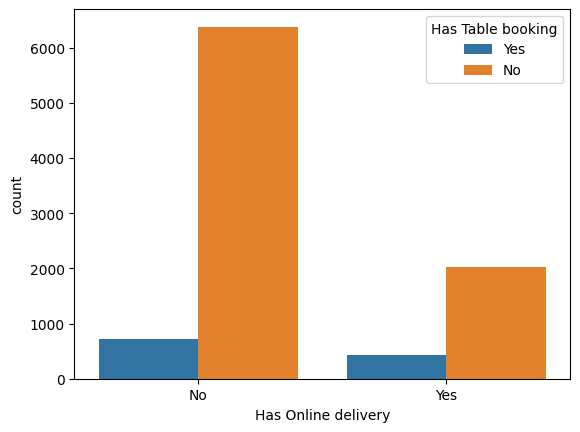

In [143]:
sns.countplot(x='Has Online delivery',hue='Has Table booking',data=zomato_df)
plt.show()


In [ ]:
# Most of the restaurant are not availing the table booking services but it will not impact the buisness of zomato .

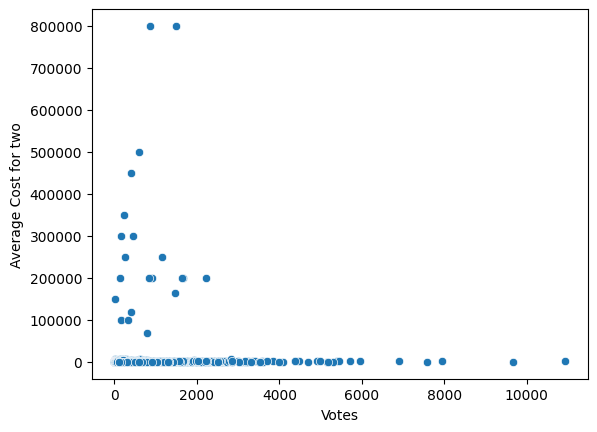

In [62]:
sns.scatterplot(x='Votes',y='Average Cost for two',data=zomato_df)
plt.show()


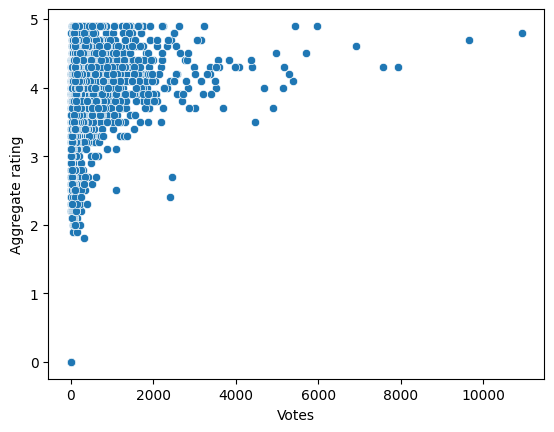

In [63]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=zomato_df)
plt.show()

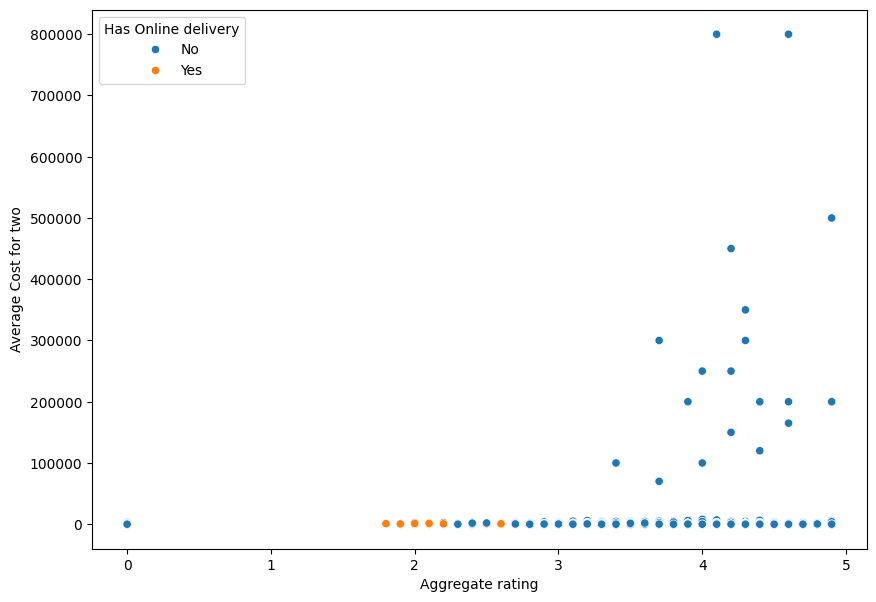

In [64]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Aggregate rating',y='Average Cost for two',hue='Has Online delivery',data=zomato_df)
plt.show()


In [ ]:
# Here we conclude that most of the restaurant are not proviing online delivery services but inspite of that also have good rating

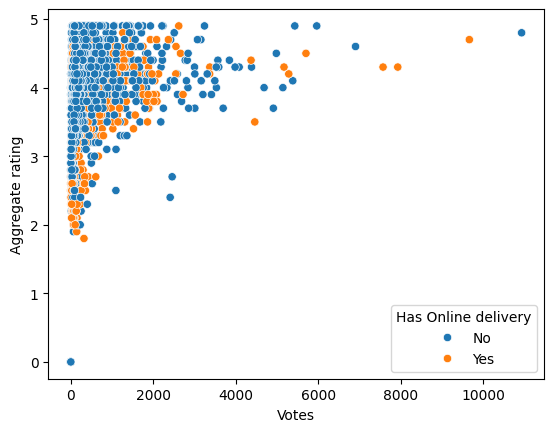

In [65]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=zomato_df,hue='Has Online delivery')
plt.show()


In [17]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [23]:
zomato_df['Locality Verbose']

0       Century City Mall, Poblacion, Makati City, Mak...
1       Little Tokyo, Legaspi Village, Makati City, Ma...
2       Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...
3       SM Megamall, Ortigas, Mandaluyong City, Mandal...
4       SM Megamall, Ortigas, Mandaluyong City, Mandal...
                              ...                        
9546                                    Karak?y, ?stanbul
9547                                   Ko?uyolu, ?stanbul
9548                                  Kuru?e?me, ?stanbul
9549                                  Kuru?e?me, ?stanbul
9550                                       Moda, ?stanbul
Name: Locality Verbose, Length: 9551, dtype: object

In [ ]:
                    # Dropping  Unnecessary columns

In [31]:
zomato_df.drop(columns=['Restaurant ID','Locality Verbose'],axis=1,inplace=True)

In [15]:
zomato_df

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml? Gurme,208,?stanbul,"Kemanke? Karamustafa Pa?a Mahallesi, R?ht?m Ca...",Karak?y,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A?ac?,208,?stanbul,"Ko?uyolu Mahallesi, Muhittin ?st?nda? Caddesi,...",Ko?uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,?stanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A??k Kahve,208,?stanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [15]:
                #separating Numerical feature and categorical Feature 
numerical=[]
categorical=[]
for col in zomato_df:
    if zomato_df[col].dtypes=='object':
        categorical.append(col)
    else:
        numerical.append(col)

In [16]:
categorical


['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text',
 'Country']

In [17]:
numerical

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [ ]:
                        #ENCODING CATEGORICAL FEATURES

In [18]:
le=LabelEncoder()
for col in zomato_df:
    if zomato_df[col].dtypes=='object':
        zomato_df[col] = le.fit_transform(zomato_df[col])

In [19]:
zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3750,162,74,8688,175,176,121.027535,14.565443,920,...,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3174,162,74,6057,597,605,121.014101,14.553708,1111,...,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2899,162,76,4686,312,318,121.056831,14.581404,1671,...,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4708,162,76,8693,866,879,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5524,162,76,8692,866,879,121.057508,14.584450,1122,...,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4444,208,0,5930,523,529,28.977392,41.022793,1813,...,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1313,208,0,5963,548,554,29.041297,41.009847,1824,...,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3071,208,0,5970,560,567,29.034640,41.055817,1110,...,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,102,208,0,5971,560,567,29.036019,41.057979,1657,...,11,0,0,0,4,4.0,1,5,901,11


In [20]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3750,162,74,8688,175,176,121.027535,14.565443,920,...,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3174,162,74,6057,597,605,121.014101,14.553708,1111,...,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2899,162,76,4686,312,318,121.056831,14.581404,1671,...,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4708,162,76,8693,866,879,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5524,162,76,8692,866,879,121.057508,14.584450,1122,...,0,1,0,0,4,4.8,0,1,229,6


In [ ]:
# Statistical summary of the dataset

In [21]:
zomato_df.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.528845,18.365616,79.088158,4542.569050,661.502775,680.643074,64.126574,25.854381,989.953408,...,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,8.791521e+06,2142.771452,56.750546,23.266005,2565.809746,315.930852,331.767734,41.467058,11.007935,514.722387,...,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1777.500000,1.000000,77.000000,2323.500000,386.000000,392.000000,77.081343,28.478713,497.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.004089e+06,3595.000000,1.000000,89.000000,4610.000000,700.000000,711.000000,77.191964,28.570469,1127.000000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835229e+07,5485.500000,1.000000,89.000000,6746.500000,924.000000,956.000000,77.282006,28.642758,1355.000000,...,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,1.850065e+07,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.000000,...,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


In [ ]:
KEY OBSERVATION:
count of every feature is same as there are no missing values in the feature
Difference between 75% and max in Average Cost for two, and Votes is high this columns is  indicating presence of outliers.
In some features Mean to Standrad of deviation difference is close.
In Average cost for two has mean and std difference is very high.

                #Correlation of the features with target column

In [22]:
zomato_df.corr()['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.075083
Votes                   0.067783
Aggregate rating        0.051792
Longitude               0.045891
Currency                0.045615
Country Code            0.043225
Rating text             0.031439
Address                 0.022800
Restaurant Name         0.019266
Has Table booking       0.007758
Cuisines                0.005757
Restaurant ID          -0.001693
Is delivering now      -0.001862
Country                -0.004034
Locality Verbose       -0.011649
Locality               -0.011929
Has Online delivery    -0.018974
City                   -0.028116
Rating color           -0.049970
Latitude               -0.111088
Name: Average Cost for two, dtype: float64

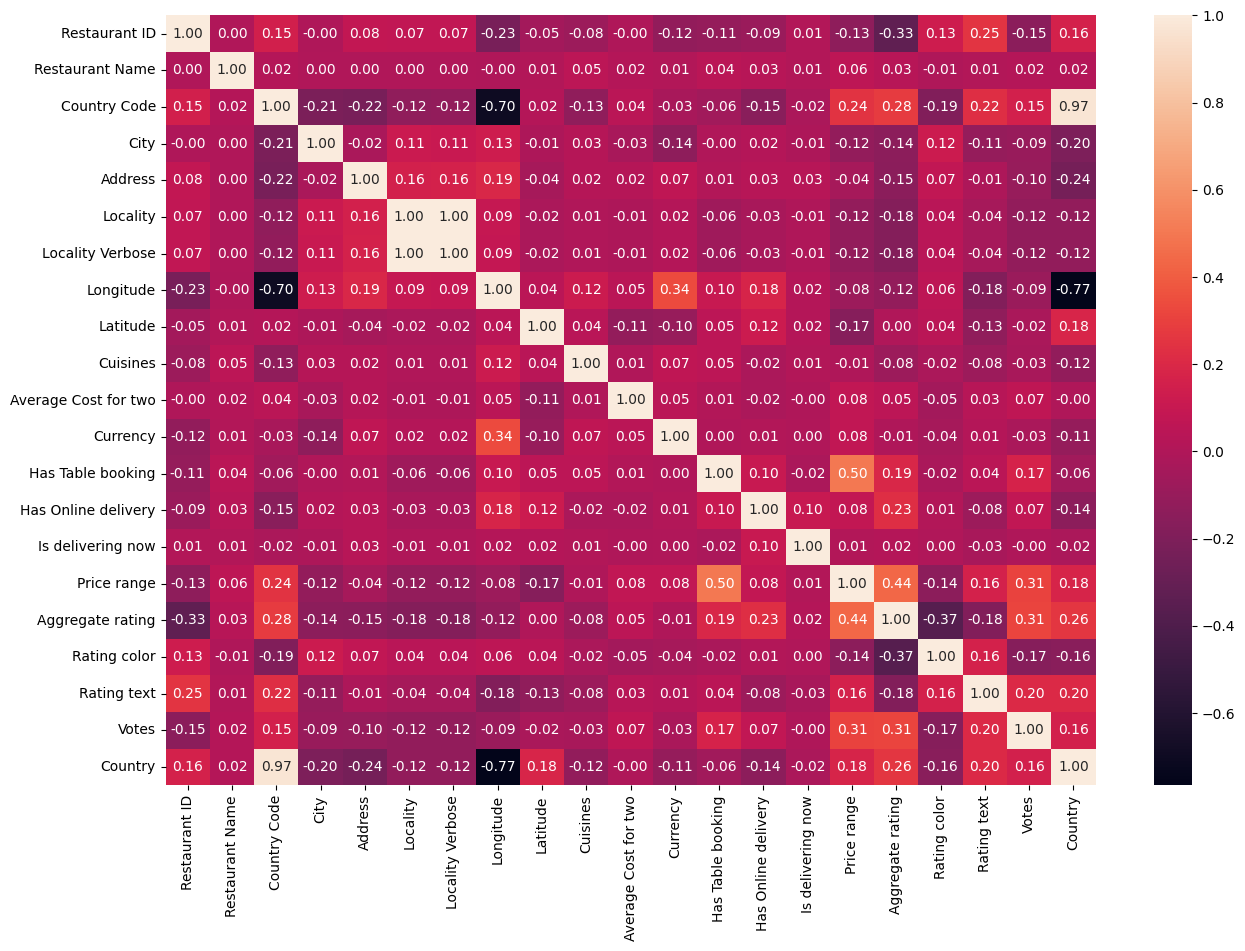

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(zomato_df.corr(), annot=True, fmt ='.2f')
plt.show()


In [24]:
zomato_df.drop('Country Code',axis=1,inplace=True)

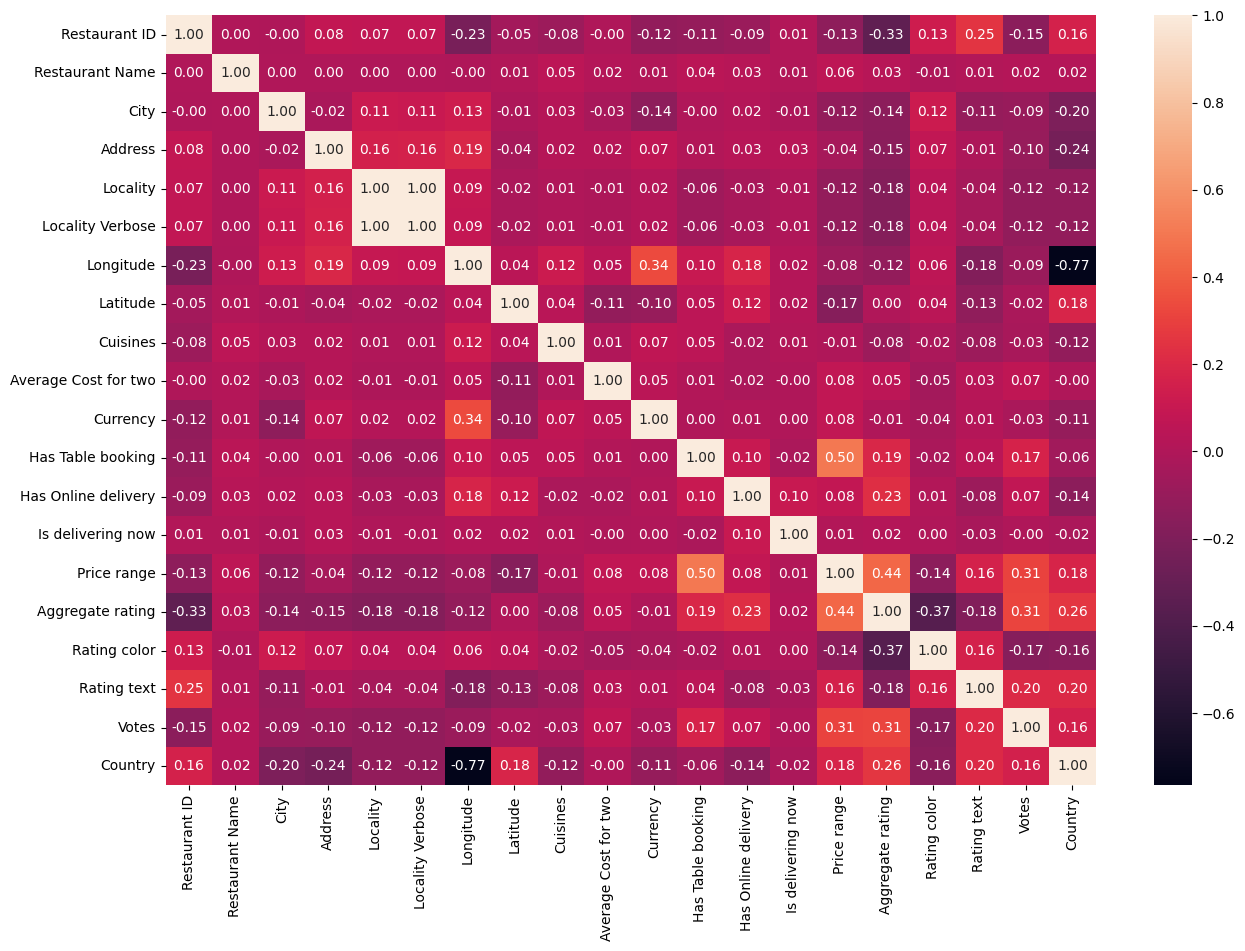

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(zomato_df.corr(), annot=True, fmt ='.2f')
plt.show()


            Visualizing correlation of feature columns with label column

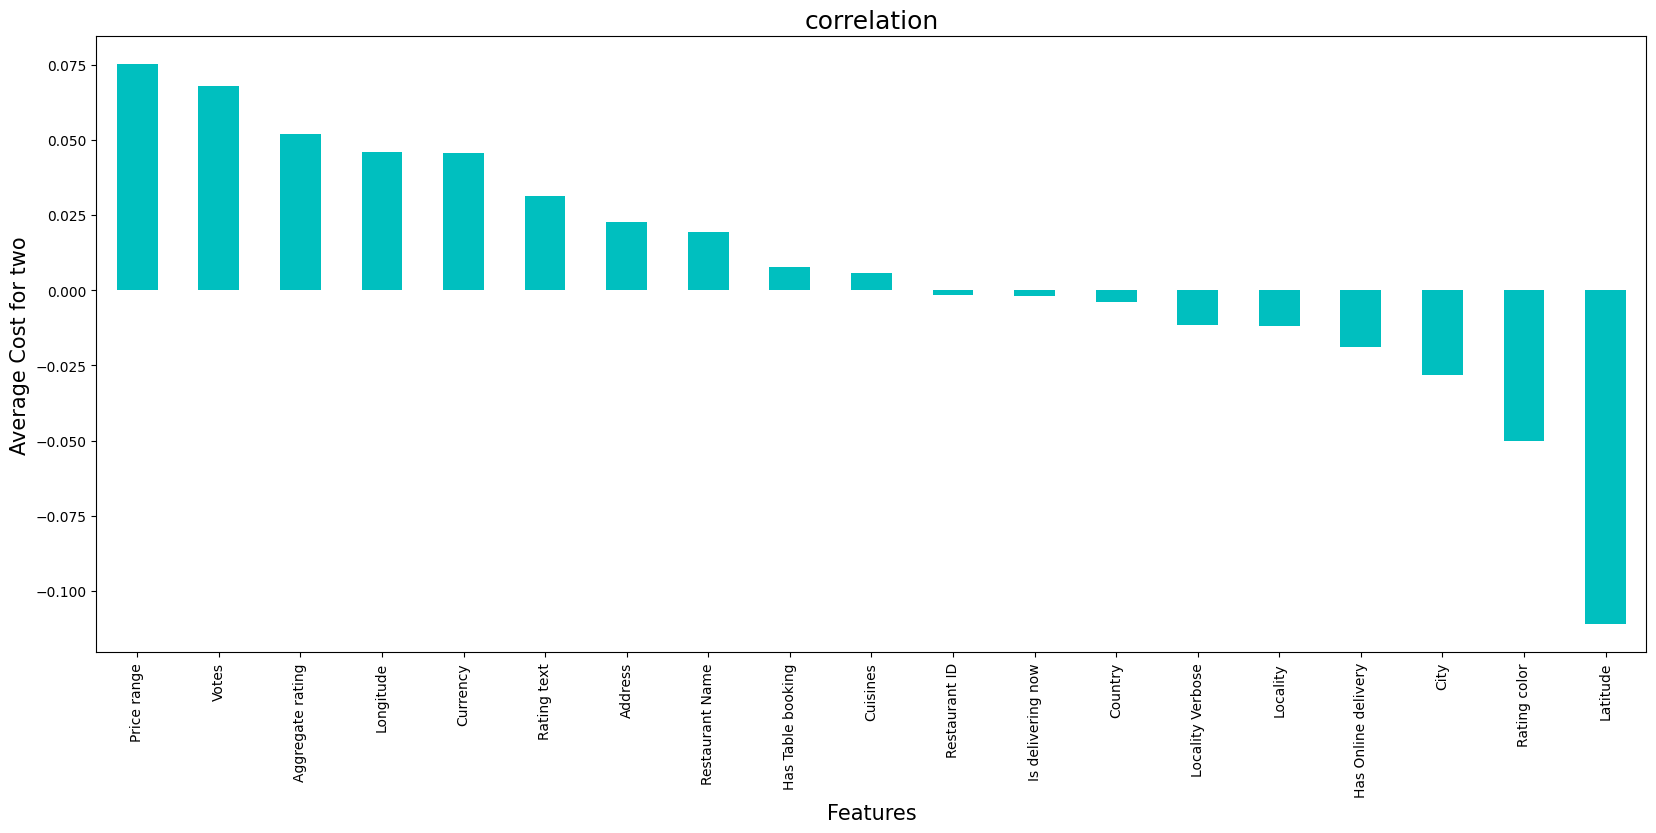

In [26]:
plt.figure(figsize = (20,8))
zomato_df.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()


                        Checking Distribution of data

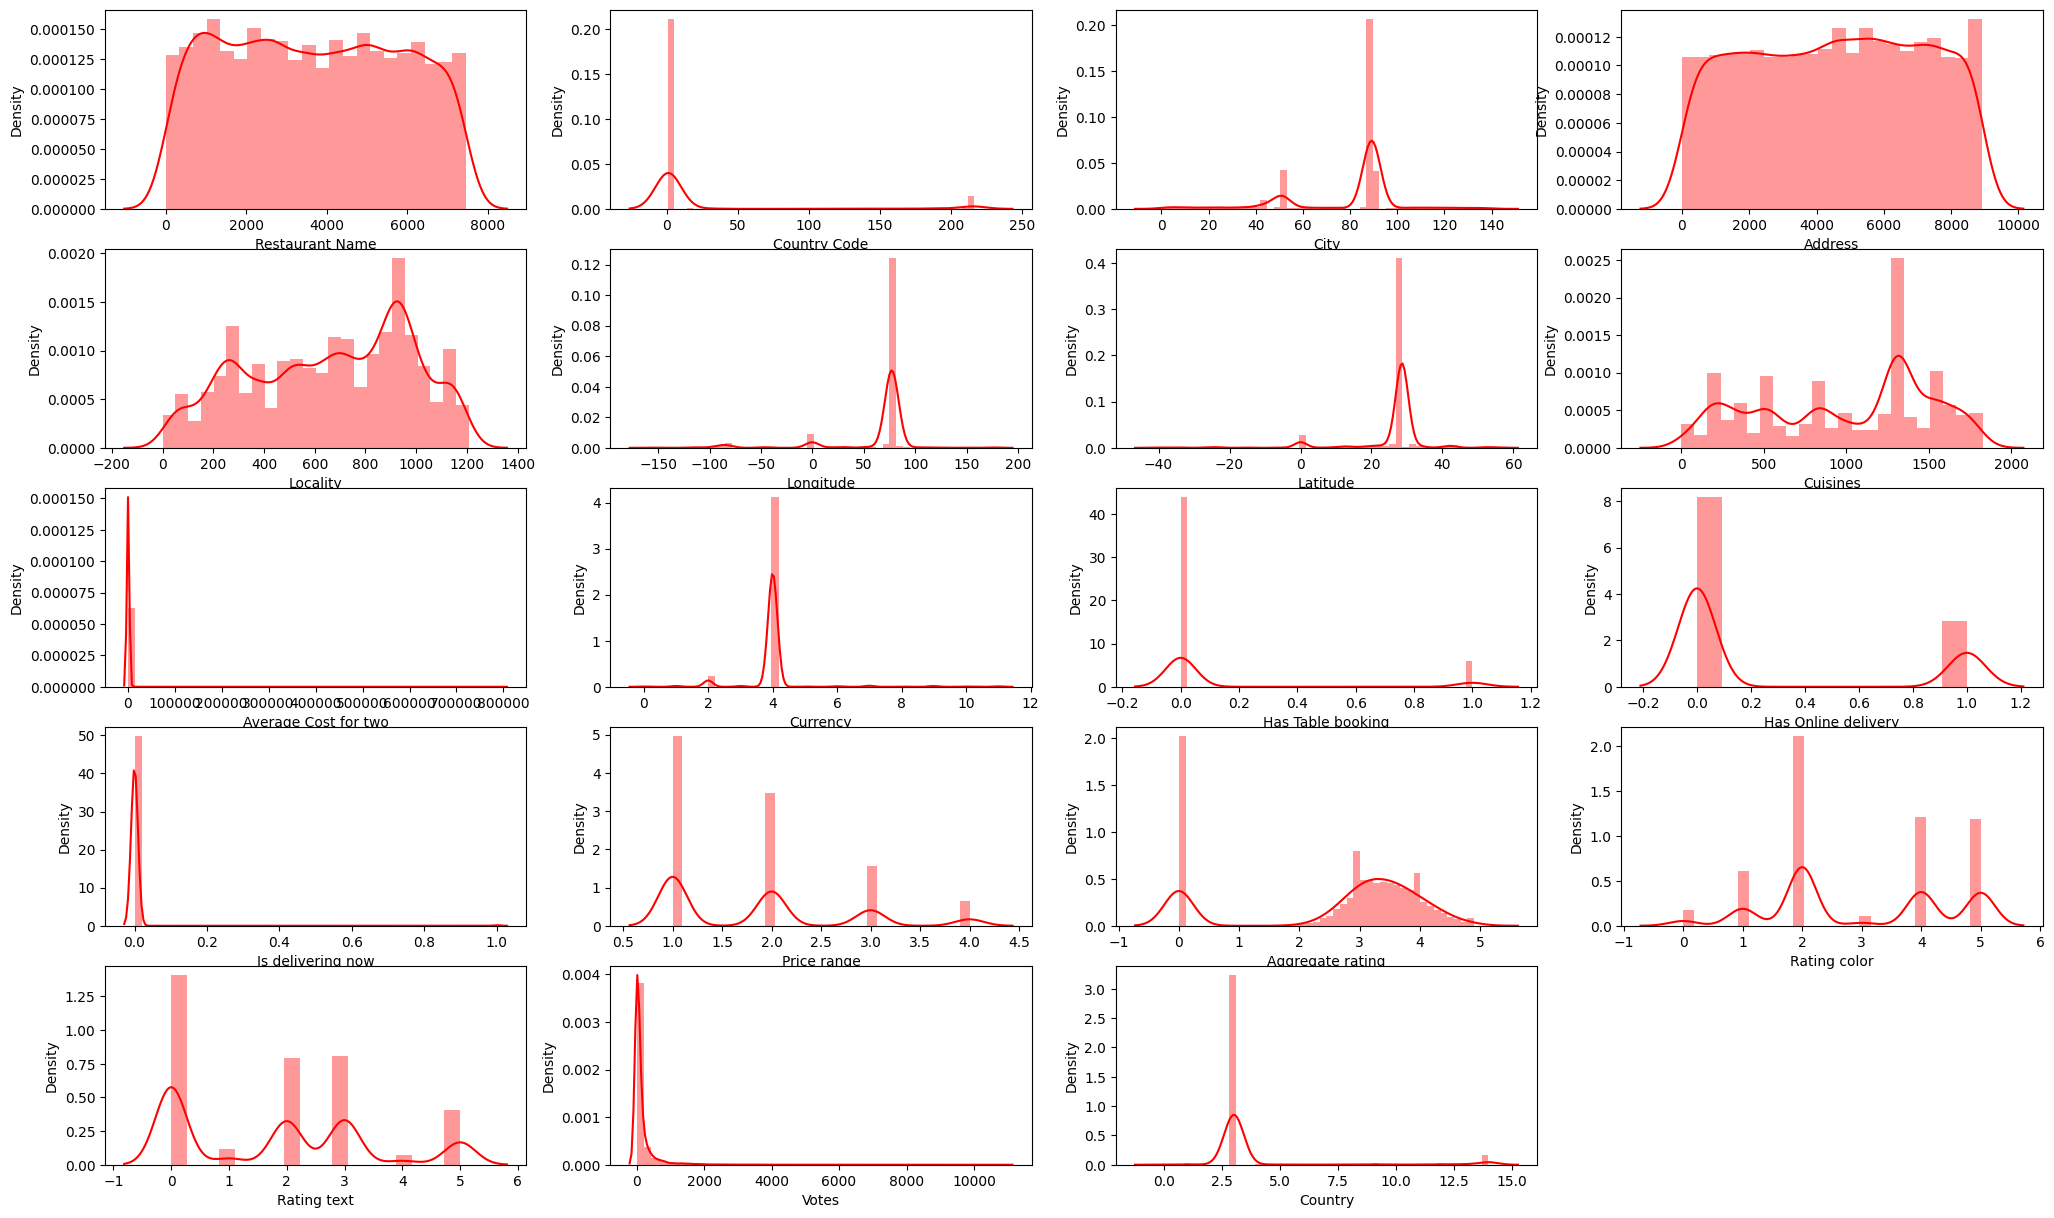

In [33]:
plt.figure(figsize=(25,15))
for col in enumerate(zomato_df):
    plt.subplot(5,4,col[0]+1)
    sns.distplot(zomato_df[col[1]],color='red')
plt.show()
    

In [ ]:
# from the above distribution plot we conclude that in  almost all the feature have skewness 
# Average cost for two and votes contains outliers.


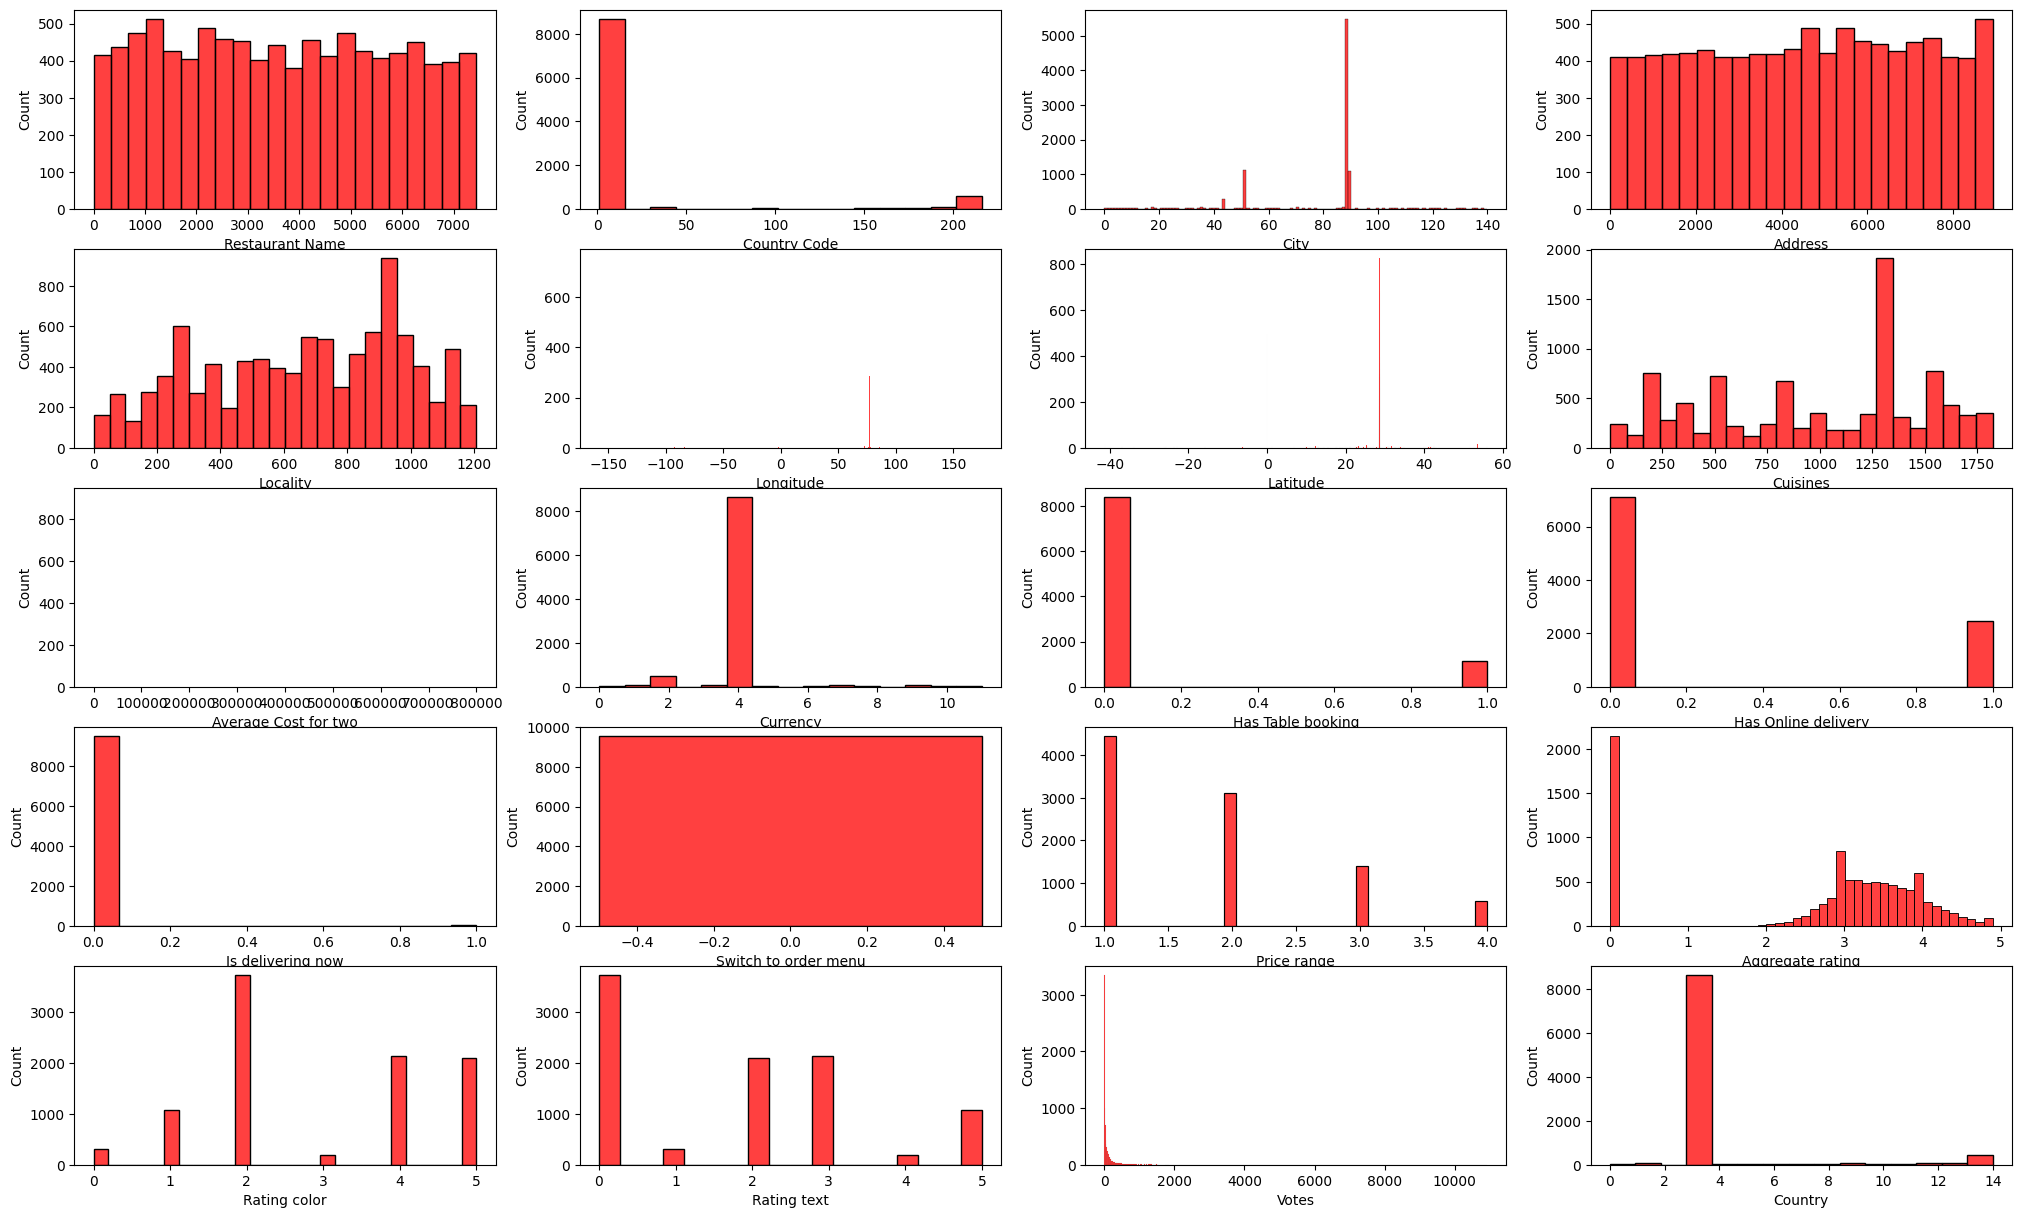

In [52]:
plt.figure(figsize=(25,15))
for col in enumerate(zomato_df):
    plt.subplot(5,4,col[0]+1)
    sns.histplot(zomato_df[col[1]],color='red')
plt.show()
    

                           # Checking for Outliers 

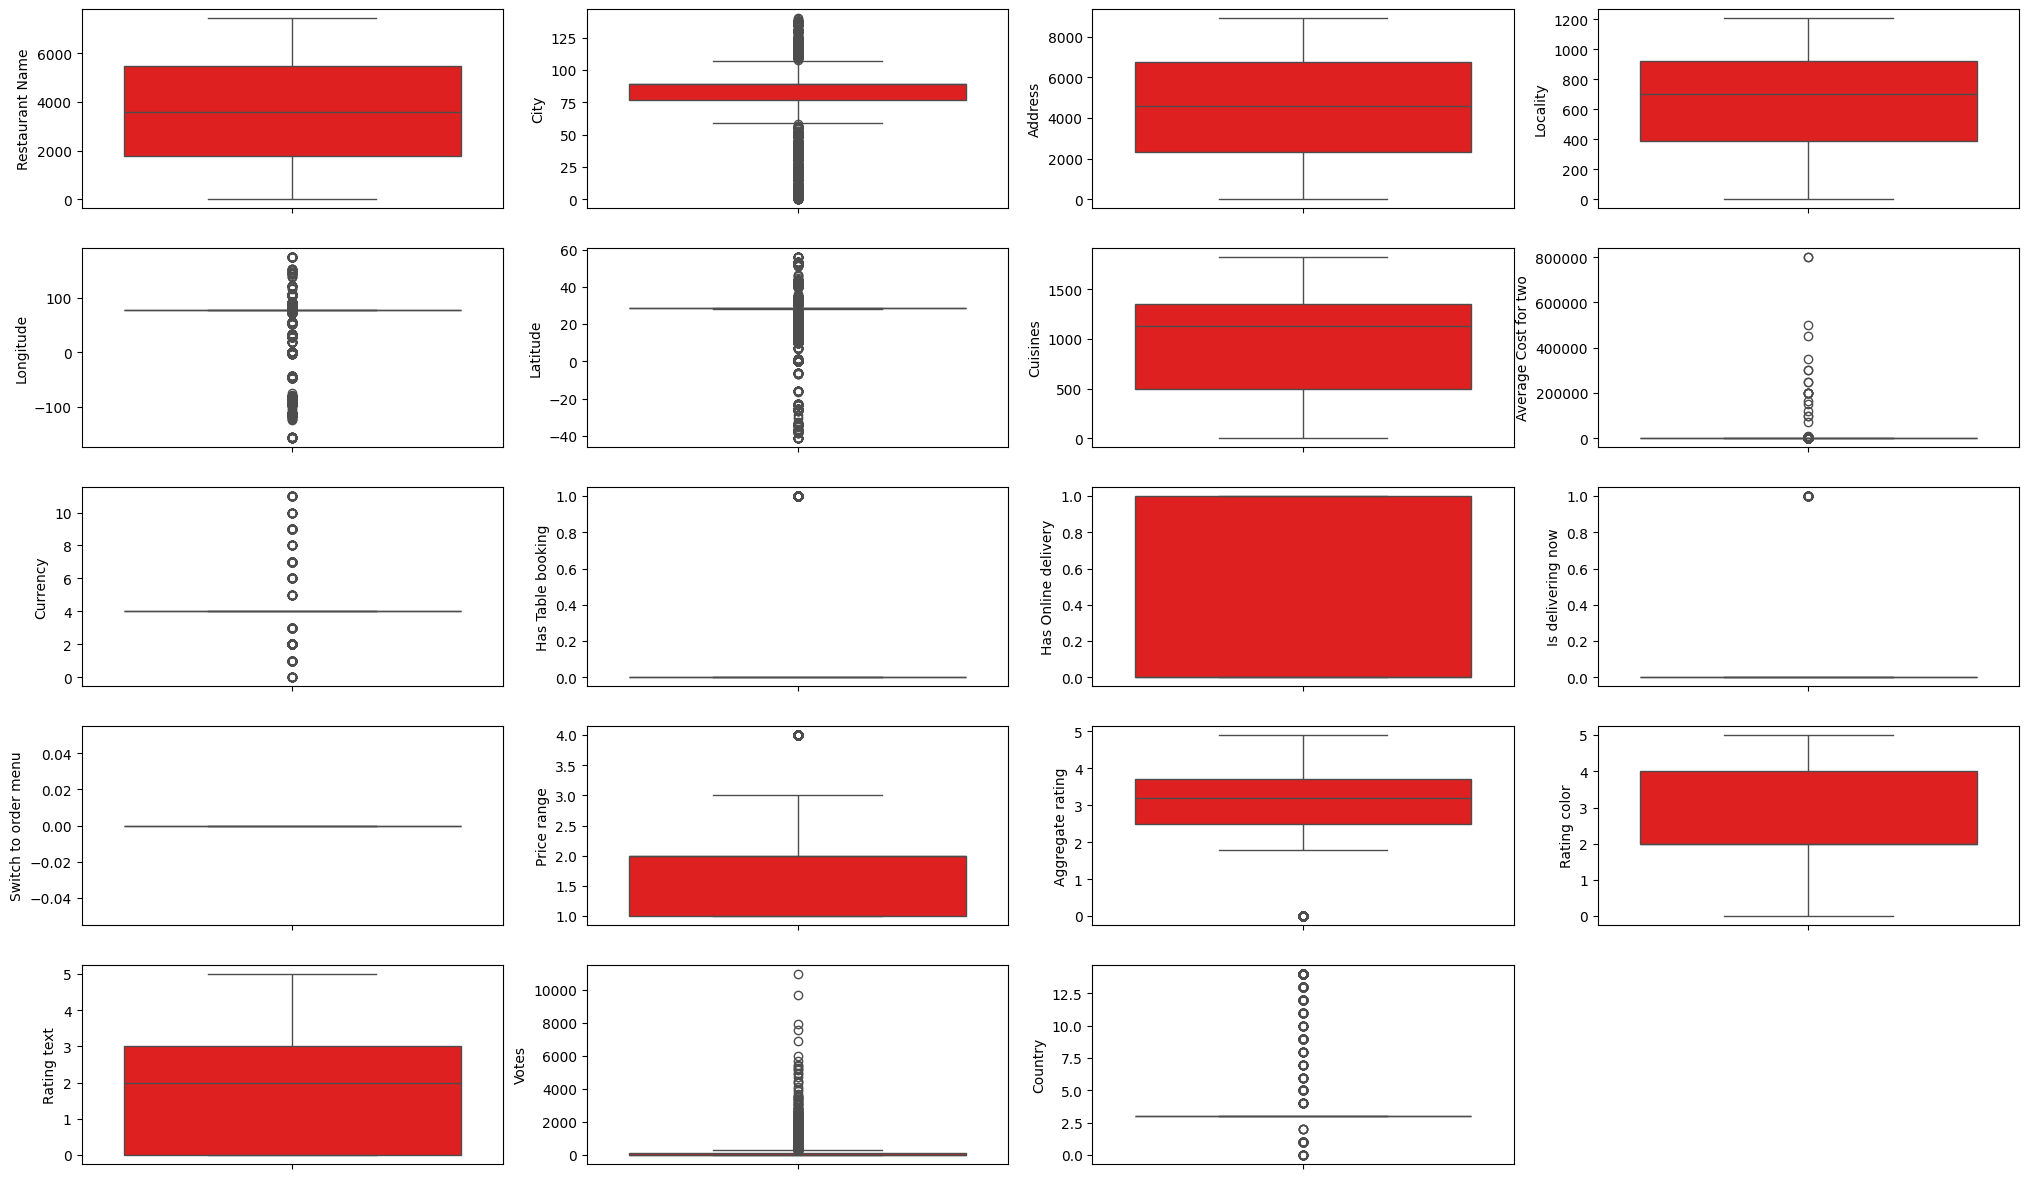

In [242]:
plt.figure(figsize=(25,15))
for col in enumerate(zomato_df):
    plt.subplot(5,4,col[0]+1)
    sns.boxplot(zomato_df[col[1]],color='red')
plt.show()
    

In [27]:
zomato_df.dtypes

Restaurant Name           int32
City                      int32
Address                   int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

In [28]:
numerical

['Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [ ]:
 #Removing outliers only from the continuous data 

In [27]:
from scipy.stats import zscore

z_score = zscore(zomato_df[['Average Cost for two','Votes']]) 
abs_z_score = np.abs(z_score)    

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = zomato_df[filtering_entry]

In [28]:
df

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3750,74,8688,175,176,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3174,74,6057,597,605,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2899,76,4686,312,318,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4708,76,8693,866,879,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5524,76,8692,866,879,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4444,0,5930,523,529,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1313,0,5963,548,554,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3071,0,5970,560,567,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,102,0,5971,560,567,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901,11


In [ ]:
                #Checking for loss of data after removing Outliers 

In [29]:
data_loss = ((9551 - 9362)/9551*100)
print(data_loss,'%')

1.978850382158936 %


In [33]:
df.drop(['Restaurant ID','Locality Verbose'],axis=1,inplace=True)

In [ ]:
                        #Checking for skewness 

In [34]:
df.skew()

Restaurant Name          0.047933
City                    -1.259986
Address                 -0.046654
Locality                -0.269444
Longitude               -2.804979
Latitude                -3.124155
Cuisines                -0.305814
Average Cost for two     3.619524
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Price range              0.933571
Aggregate rating        -0.940907
Rating color             0.047268
Rating text              0.434638
Votes                    3.216882
Country                  3.326986
dtype: float64

In [155]:
#skew_list=['Average Cost for two','Price range','Aggregate rating','Votes','Country Code']

In [36]:
del numerical[0:2]

In [37]:

#from sklearn.preprocessing import power_transform
for col in numerical:
    df[col]=  np.cbrt(df[col])


In [273]:
#for col in categorical:
    #zomato_df[col]=  np.log1p(zomato_df[col])


In [38]:

df.skew()

Restaurant Name          0.047933
City                    -1.259986
Address                 -0.046654
Locality                -0.269444
Longitude               -2.925423
Latitude                -3.907978
Cuisines                -0.305814
Average Cost for two     0.464188
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Price range              0.531478
Aggregate rating        -1.244232
Rating color             0.047268
Rating text              0.434638
Votes                    0.690515
Country                  3.326986
dtype: float64

In [38]:
df

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3750,74,8688,175,4.946463,2.442163,920,10.322801,0,1,0,0,1.442250,1.686865,0,1,6.796884,6
1,3174,74,6057,597,4.946280,2.441507,1111,10.626586,0,1,0,0,1.442250,1.650964,0,1,8.391942,6
2,2899,76,4686,312,4.946862,2.443054,1671,15.874011,0,1,0,0,1.587401,1.638643,1,5,6.463304,6
3,4708,76,8693,866,4.946857,2.443273,1126,11.447142,0,0,0,0,1.587401,1.698499,0,1,7.146569,6
4,5524,76,8692,866,4.946871,2.443224,1122,11.447142,0,1,0,0,1.587401,1.686865,0,1,6.118033,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4444,0,5930,523,3.071518,3.448856,1813,4.308869,11,0,0,0,1.442250,1.600521,1,5,9.236528,11
9547,1313,0,5963,548,3.073775,3.448493,1824,4.717694,11,0,0,0,1.442250,1.613429,1,5,10.112073,11
9548,3071,0,5970,560,3.073540,3.449781,1110,5.539658,11,0,0,0,1.587401,1.546680,5,2,8.710983,11
9549,102,0,5971,560,3.073588,3.449842,1657,4.932424,11,0,0,0,1.587401,1.587401,1,5,9.658468,11


In [36]:
df

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3750,74,8688,175,4.946463,2.442163,920,10.322801,0,1,0,0,1.442250,1.686865,0,1,6.796884,6
1,3174,74,6057,597,4.946280,2.441507,1111,10.626586,0,1,0,0,1.442250,1.650964,0,1,8.391942,6
2,2899,76,4686,312,4.946862,2.443054,1671,15.874011,0,1,0,0,1.587401,1.638643,1,5,6.463304,6
3,4708,76,8693,866,4.946857,2.443273,1126,11.447142,0,0,0,0,1.587401,1.698499,0,1,7.146569,6
4,5524,76,8692,866,4.946871,2.443224,1122,11.447142,0,1,0,0,1.587401,1.686865,0,1,6.118033,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4444,0,5930,523,3.071518,3.448856,1813,4.308869,11,0,0,0,1.442250,1.600521,1,5,9.236528,11
9547,1313,0,5963,548,3.073775,3.448493,1824,4.717694,11,0,0,0,1.442250,1.613429,1,5,10.112073,11
9548,3071,0,5970,560,3.073540,3.449781,1110,5.539658,11,0,0,0,1.587401,1.546680,5,2,8.710983,11
9549,102,0,5971,560,3.073588,3.449842,1657,4.932424,11,0,0,0,1.587401,1.587401,1,5,9.658468,11


In [39]:
x=df.drop('Average Cost for two',axis=1)

In [40]:
x

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3750,74,8688,175,4.946463,2.442163,920,0,1,0,0,1.442250,1.686865,0,1,6.796884,6
1,3174,74,6057,597,4.946280,2.441507,1111,0,1,0,0,1.442250,1.650964,0,1,8.391942,6
2,2899,76,4686,312,4.946862,2.443054,1671,0,1,0,0,1.587401,1.638643,1,5,6.463304,6
3,4708,76,8693,866,4.946857,2.443273,1126,0,0,0,0,1.587401,1.698499,0,1,7.146569,6
4,5524,76,8692,866,4.946871,2.443224,1122,0,1,0,0,1.587401,1.686865,0,1,6.118033,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4444,0,5930,523,3.071518,3.448856,1813,11,0,0,0,1.442250,1.600521,1,5,9.236528,11
9547,1313,0,5963,548,3.073775,3.448493,1824,11,0,0,0,1.442250,1.613429,1,5,10.112073,11
9548,3071,0,5970,560,3.073540,3.449781,1110,11,0,0,0,1.587401,1.546680,5,2,8.710983,11
9549,102,0,5971,560,3.073588,3.449842,1657,11,0,0,0,1.587401,1.587401,1,5,9.658468,11


In [41]:
y=df.loc[:,'Average Cost for two']

In [42]:
y

0       10.322801
1       10.626586
2       15.874011
3       11.447142
4       11.447142
          ...    
9546     4.308869
9547     4.717694
9548     5.539658
9549     4.932424
9550     3.802952
Name: Average Cost for two, Length: 9362, dtype: float64

In [43]:
scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [44]:
x

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046356,-0.224712,1.609852,-1.554433,0.658581,-0.299339,-0.135810,-4.331413,2.746265,-0.586149,-0.060373,1.360397,0.832618,-2.022410,-0.451916,1.373726,0.859957
1,-0.222794,-0.224712,0.585071,-0.214910,0.658496,-0.299945,0.235149,-4.331413,2.746265,-0.586149,-0.060373,1.360397,0.776130,-2.022410,-0.451916,2.027360,0.859957
2,-0.351294,-0.138362,0.051063,-1.119564,0.658767,-0.298516,1.322776,-4.331413,2.746265,-0.586149,-0.060373,2.117219,0.756744,-1.343779,1.932324,1.237030,0.859957
3,0.494005,-0.138362,1.611800,0.638957,0.658765,-0.298314,0.264282,-4.331413,-0.364131,-0.586149,-0.060373,2.117219,0.850922,-2.022410,-0.451916,1.517023,0.859957
4,0.875301,-0.138362,1.611410,0.638957,0.658771,-0.298359,0.256513,-4.331413,2.746265,-0.586149,-0.060373,2.117219,0.832618,-2.022410,-0.451916,1.095542,0.859957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,0.370645,-3.419676,0.535604,-0.449803,-0.215953,0.630320,1.598567,7.644251,-0.364131,-0.586149,-0.060373,1.360397,0.696763,-1.343779,1.932324,2.373459,2.753221
9358,-1.092391,-3.419676,0.548457,-0.370447,-0.214901,0.629985,1.619931,7.644251,-0.364131,-0.586149,-0.060373,1.360397,0.717072,-1.343779,1.932324,2.732246,2.753221
9359,-0.270923,-3.419676,0.551184,-0.332356,-0.215010,0.631175,0.233207,7.644251,-0.364131,-0.586149,-0.060373,2.117219,0.612051,1.370745,0.144144,2.158098,2.753221
9360,-1.658261,-3.419676,0.551573,-0.332356,-0.214987,0.631231,1.295585,7.644251,-0.364131,-0.586149,-0.060373,2.117219,0.676120,-1.343779,1.932324,2.546365,2.753221


In [ ]:
                  CHECKING FOR MULTICOLLINEARITY

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [46]:
x.isnull().sum()

Restaurant Name        0
City                   0
Address                0
Locality               0
Longitude              0
Latitude               0
Cuisines               0
Currency               0
Has Table booking      0
Has Online delivery    0
Is delivering now      0
Price range            0
Aggregate rating       0
Rating color           0
Rating text            0
Votes                  0
Country                0
dtype: int64

In [47]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,Restaurant Name,1.008513
1,City,1.118672
2,Address,1.111251
3,Locality,1.068652
4,Longitude,4.696277
5,Latitude,1.779351
6,Cuisines,1.042249
7,Currency,1.572250
8,Has Table booking,1.421779
9,Has Online delivery,1.203701


In [62]:
#x.drop(['Longitude'],axis=1,inplace=True)

In [48]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,Restaurant Name,1.008513
1,City,1.118672
2,Address,1.111251
3,Locality,1.068652
4,Longitude,4.696277
5,Latitude,1.779351
6,Cuisines,1.042249
7,Currency,1.572250
8,Has Table booking,1.421779
9,Has Online delivery,1.203701


In [53]:
#x.drop('Currency',axis=1,inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x1_train, y1_train)
    predlr = LR.predict(x1_test)
    score = r2_score(y1_test, predlr)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.794223140268839  on Random_state  79


In [140]:
maxAccu1=0
maxRS1=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu1:
        maxAccu1=r2
        maxRS1=i

print("Best r2 score is", maxAccu1,"on Random State", maxRS1)

Best r2 score is 0.9183483373503841 on Random State 171


In [141]:
lr=LinearRegression()
rg=Ridge()
etc=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=2)
svr=SVR(kernel='rbf')
xgb = XGBRegressor()

In [142]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [143]:
def regressor_models(model,x1_train,y1_tain,x1_test,y1_test):
    model.fit(x1_train,y1_train)
    pred_test=model.predict(x1_test)

    pred_train=model.predict(x1_train)
    print('R2_score',r2_score(y1_test,pred_test)*100)
    print('R2 score on training data',r2_score(y1_train,pred_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y1_test,pred_test))
    print('Mean Squared  Error',mean_squared_error(y1_test,pred_test))
    print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y1_test,pred_test)))

    

In [144]:
models=[lr,rg,etc,gbr,rfr,knr,svr,xgb ]


for model in models:
    print('Score for {}'.format(model))
    regressor_models(model,x1_train,y1_train,x1_test,y1_test)
    print('*'*50)

Score for LinearRegression()
R2_score 79.4223140268839
R2 score on training data 76.44442790888964
Mean Absolute Error 0.7533294437768127
Mean Squared  Error 1.1168773550963977
Root Mean Absolute Error 1.0568241836258279
**************************************************
Score for Ridge()
R2_score 79.42155222576052
R2 score on training data 76.44441936647756
Mean Absolute Error 0.7533188010080045
Mean Squared  Error 1.1169187027204641
Root Mean Absolute Error 1.0568437456504458
**************************************************
Score for ExtraTreesRegressor()
R2_score 91.47725069253802
R2 score on training data 100.0
Mean Absolute Error 0.49806766386686196
Mean Squared  Error 0.46258193059723984
Root Mean Absolute Error 0.6801337593424104
**************************************************
Score for GradientBoostingRegressor()
R2_score 90.16954900759843
R2 score on training data 90.76569943357417
Mean Absolute Error 0.5546146591934167
Mean Squared  Error 0.5335589297135919
Root Mean Abs

In [145]:
from sklearn.model_selection import cross_val_score

In [147]:
def cross_validation(model,x,y):
    pred_test=model.predict(x1_test)
    score=cross_val_score(model,x,y,scoring='r2')
    print(score)
    print(score.mean())
    print('difference between r2 score and cross validation score is ',(r2_score(y1_test,pred_test)-score.mean())*100)

In [148]:
for model in models:
    print('Cross validation for {}'.format(model))
    cross_validation(model,x,y)
    print('*'*50)

Cross validation for LinearRegression()
[ 0.2538159   0.79891573  0.78265876  0.77787354 -0.61424656]
0.39980347194163995
difference between r2 score and cross validation score is  39.441966832719906
**************************************************
Cross validation for Ridge()
[ 0.26707227  0.7988611   0.78262578  0.7778245  -0.61387439]
0.4025018506705324
difference between r2 score and cross validation score is  39.17136715870729
**************************************************
Cross validation for ExtraTreesRegressor()
[0.60210383 0.87439362 0.86556972 0.88983265 0.50738774]
0.7478575113565252
difference between r2 score and cross validation score is  16.691499556885503
**************************************************
Cross validation for GradientBoostingRegressor()
[0.44912784 0.86364289 0.85157536 0.87298571 0.02053079]
0.6115725186335216
difference between r2 score and cross validation score is  29.01229714424628
**************************************************
Cross vali

In [ ]:
Score for ExtraTreesRegressor()
R2_score 91.52752957794952
R2 score on training data 100.0
Mean Absolute Error 0.4981481322359833
Mean Squared  Error 0.45985298679719544
Root Mean Absolute Error 0.6781246100807693

Cross validation for ExtraTreesRegressor()
[0.58733922 0.87558654 0.86538472 0.88954423 0.50837558]
0.7452460592490067
difference between r2 score and cross validation score is  17.002923653048864
compared to other model differece between r2 score and cross validation score is less

In [ ]:
                                HyperParamter Tunning of ExtraTreesRegressor using GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    'n_estimators': [10, 50, 100],
   'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
    
    'max_depth': [2, 8, 16, 32, 50],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
    #'bootstrap': [True, False],
    #'warm_start': [True, False]
}

In [61]:
etc=ExtraTreesRegressor()
grid_search=GridSearchCV(etc,param_grid,cv=5)

In [ ]:
grid_search.fit(x1_train,y1_train)

In [149]:
final_model=ExtraTreesRegressor(n_estimators=100,criterion='friedman_mse',max_depth=50,min_samples_leaf=2,max_features='sqrt')


In [150]:
final_model.fit(x1_train,y1_train)
pred_test=model.predict(x1_test)

pred_train=model.predict(x1_train)
print('R2_score',r2_score(y1_test,pred_test)*100)
print('R2 score on training data',r2_score(y1_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y1_test,pred_test))
print('Mean Squared  Error',mean_squared_error(y1_test,pred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y1_test,pred_test)))

    

R2_score 91.19429330973252
R2 score on training data 98.09013035195862
Mean Absolute Error 0.5101320059848771
Mean Squared  Error 0.47793976498764196
Root Mean Absolute Error 0.6913318776012299


In [ ]:
                PLOTTING A DATA POINTS ON RERESSION LINE USING  REGPLOT 

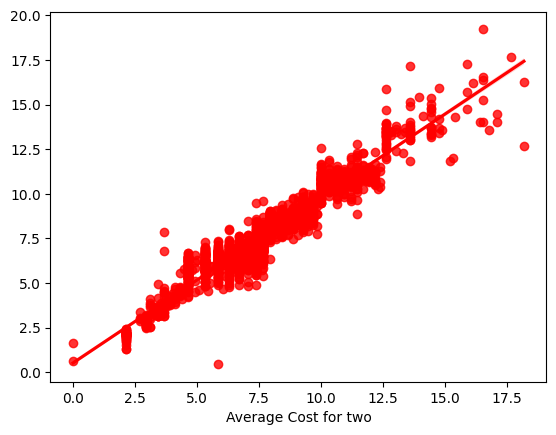

In [68]:
#most of the data are fitted in best fit line 
sns.regplot(x=y1_test,y=pred_test,color='red')
plt.show()

In [128]:
joblib.dump(final_model,'Zomato_Restaurant_Regressor.pkl')

['Zomato_Restaurant_Regressor.pkl']

In [129]:
final_model_regressor=joblib.load('Zomato_Restaurant_Regressor.pkl')

In [151]:
prediction=final_model.predict(x1_test)

In [152]:
df1=pd.DataFrame()
df1['prediction']=prediction

In [153]:
dummy_test=np.array(y1_test)

In [154]:
df1['orignal']=dummy_test
df1

,prediction,orignal
0,8.294274,8.434327
1,6.362832,6.694330
2,6.912520,7.047299
3,11.189226,10.913929
4,6.385747,5.848035
...,...,...
2804,6.614622,5.848035
2805,8.363571,8.879040
2806,11.171094,10.626586
2807,9.479590,9.830476


#        Model Building For Predicting Price range (Classification)


In [69]:

zomato_df.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3750,74,8688,175,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,3174,74,6057,597,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,2899,76,4686,312,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,4708,76,8693,866,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,5524,76,8692,866,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6


In [70]:
x1 = zomato_df.drop(columns=['Price range'],axis=1)



In [71]:
y1 = zomato_df.loc[:,'Price range']

In [72]:
x1.value_counts()

Restaurant Name  City  Address  Locality  Longitude  Latitude   Cuisines  Average Cost for two  Currency  Has Table booking  Has Online delivery  Is delivering now  Aggregate rating  Rating color  Rating text  Votes  Country
0                90    3971     963       0.000000   0.000000   549       400                   4         0                  0                    0                  0.0               4             3            0      3          1
4908             89    1941     880       77.223190  28.535749  115       850                   4         0                  0                    0                  0.0               4             3            1      3          1
4909             89    4995     1153      77.204008  28.694381  1408      800                   4         0                  1                    0                  4.1               1             5            636    3          1
4910             89    5835     220       77.219858  28.635250  143       1200       

In [73]:
y1.value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [74]:
x1.shape

(9551, 17)

In [75]:
y1.shape

(9551,)

In [76]:
x1.isnull().sum()

Restaurant Name         0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [68]:
x1.dtypes

Restaurant Name           int32
City                      int32
Address                   int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

In [77]:
x1.skew()

Restaurant Name          0.044755
City                    -1.243427
Address                 -0.040419
Locality                -0.255895
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305498
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

In [ ]:
                        #CHECKING FOR DISTRIBUTION OF DATA

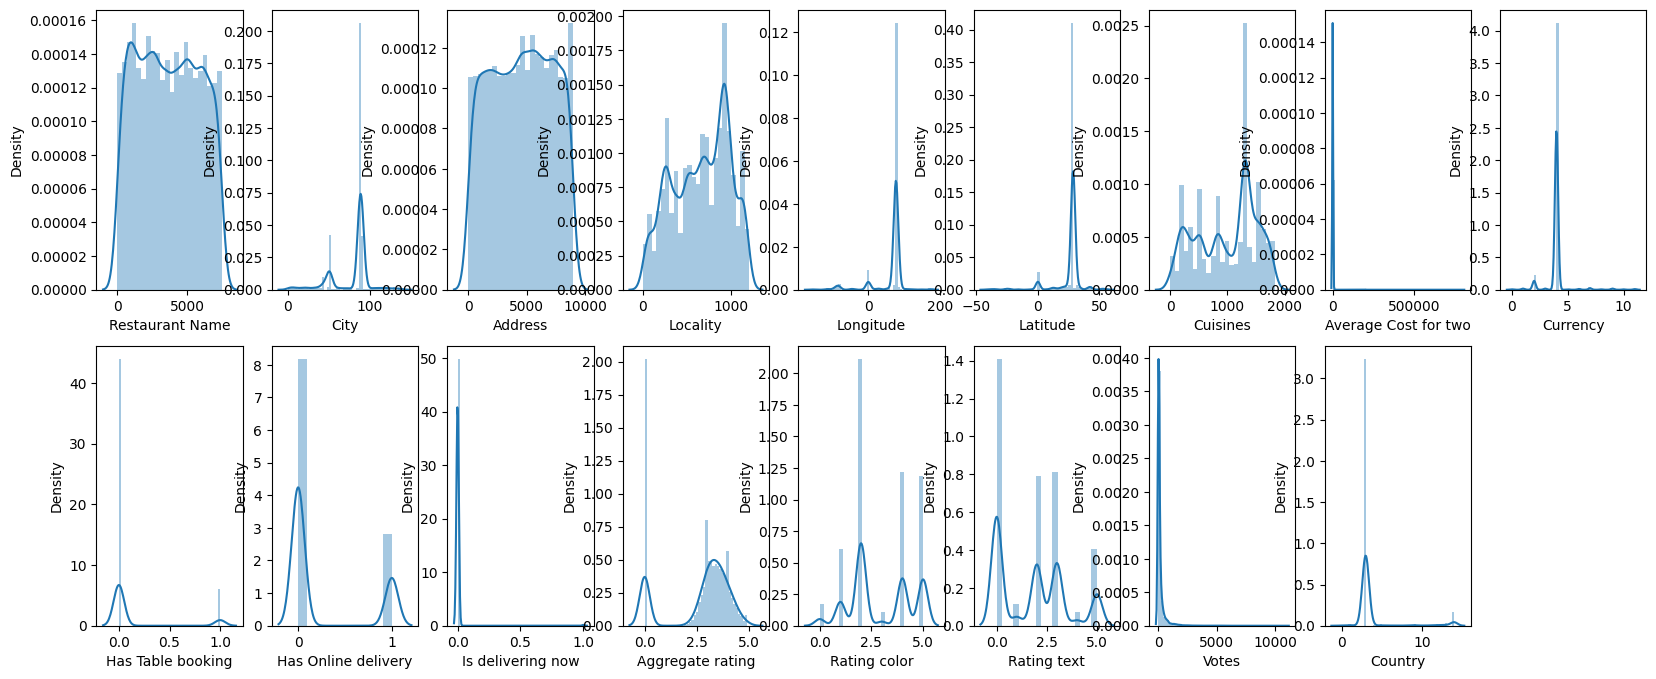

In [78]:
plt.figure(figsize=(20,8))
for col in enumerate(x1):
    
    plt.subplot(2,9,col[0]+1)
    sns.distplot(x1[col[1]])
plt.show()

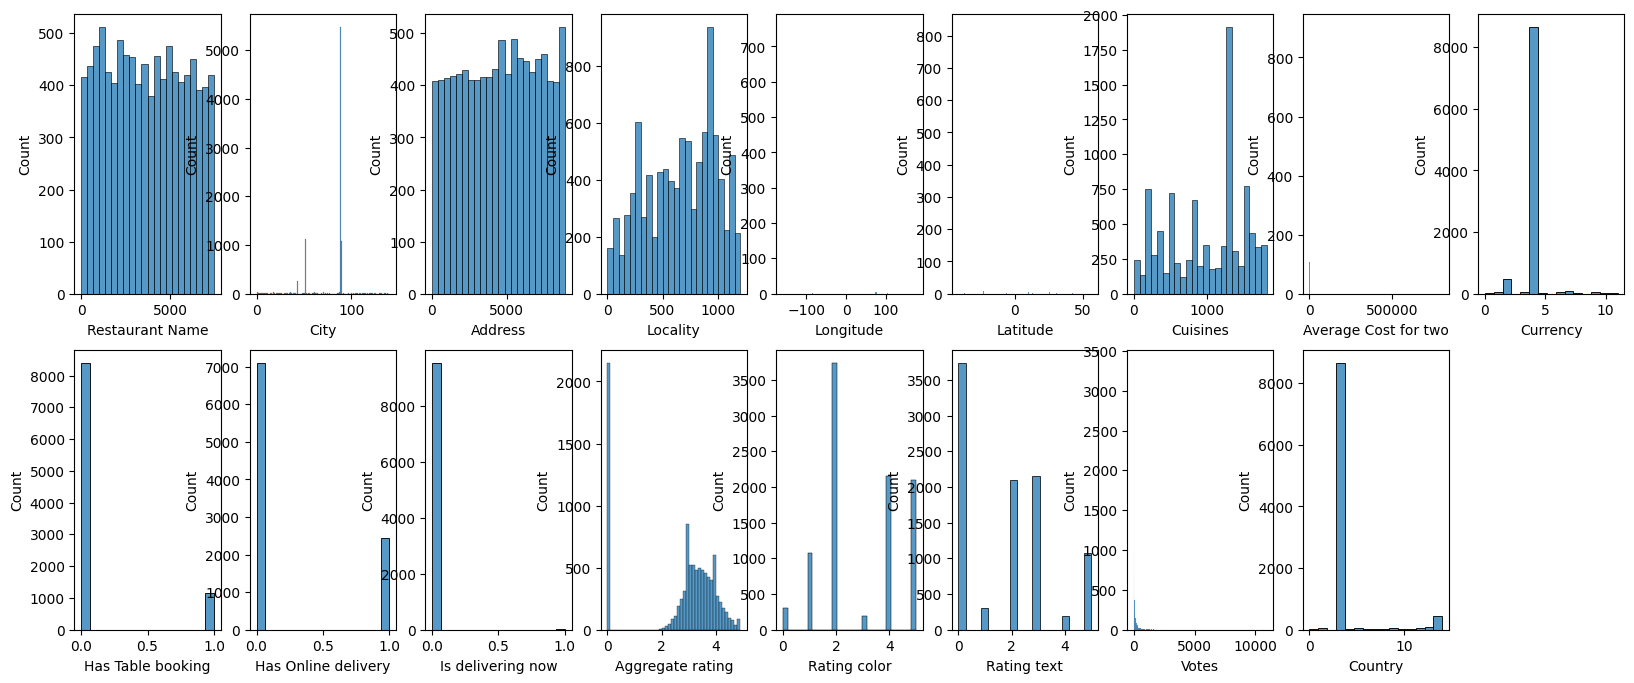

In [79]:
plt.figure(figsize=(20,8))
for col in enumerate(x1):
    
    plt.subplot(2,9,col[0]+1)
    sns.histplot(x1[col[1]])
plt.show()

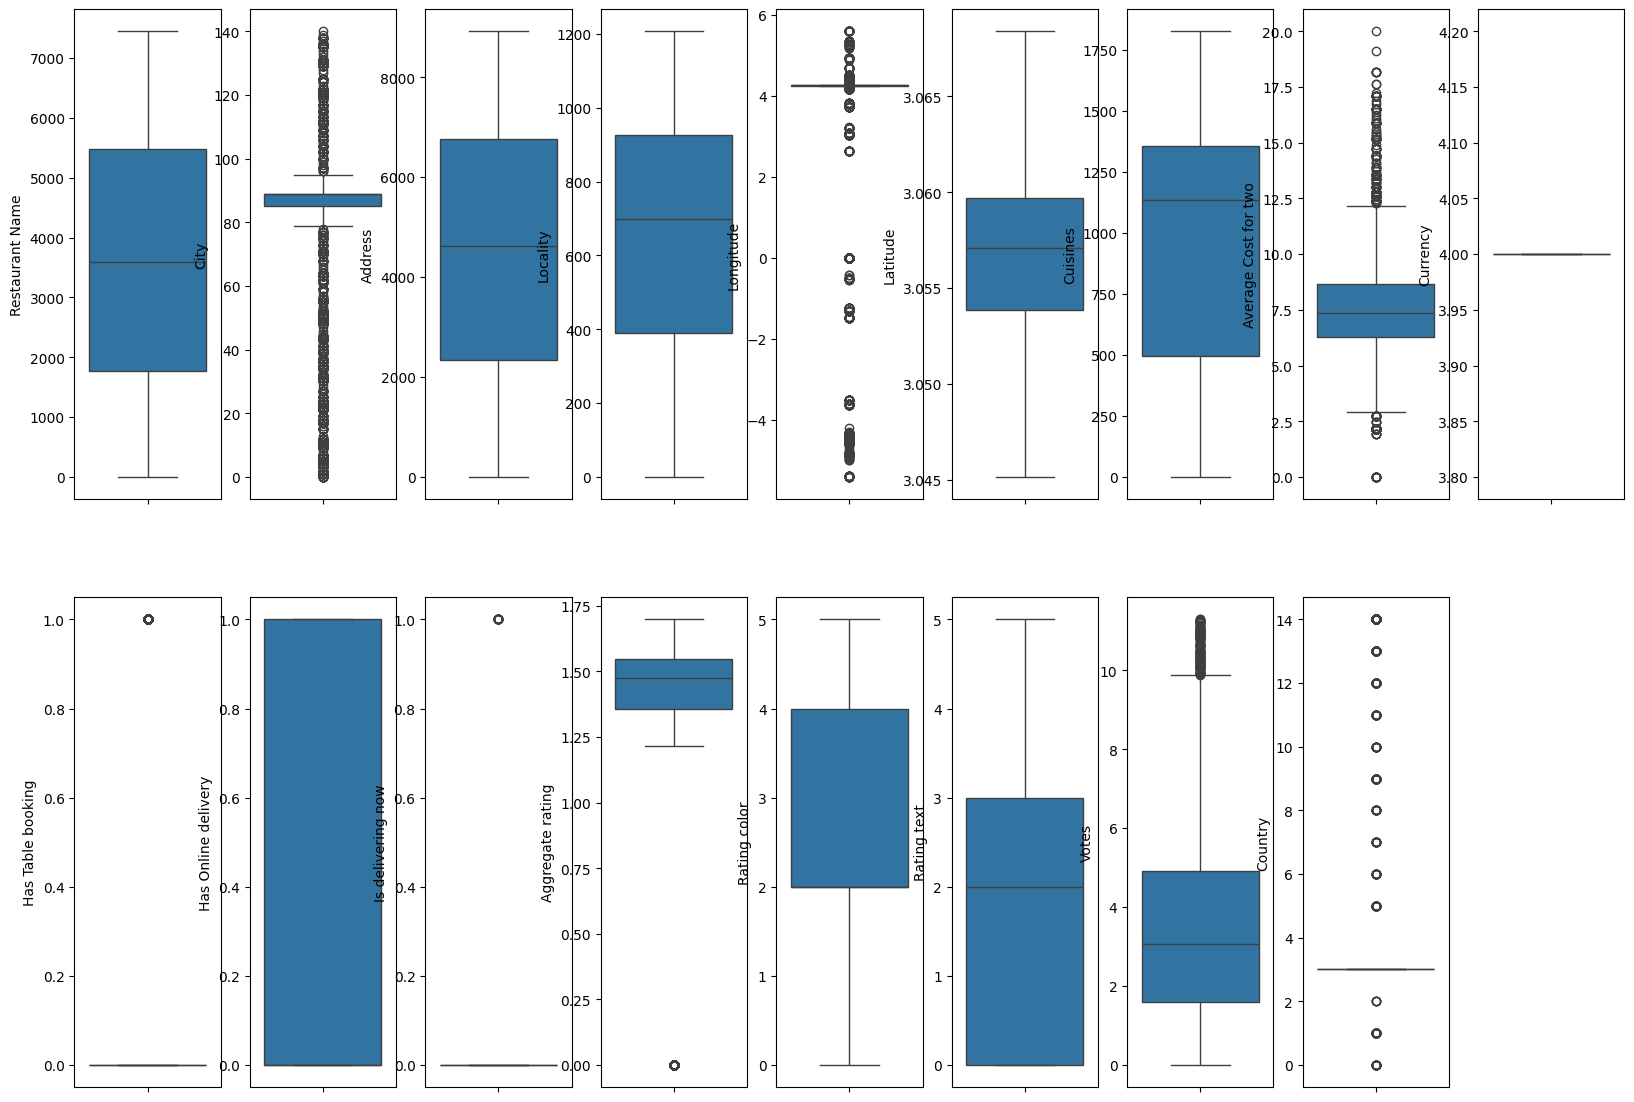

In [168]:
plt.figure(figsize=(20,14))
for col in enumerate(x1):
    
    plt.subplot(2,9,col[0]+1)
    sns.boxplot(x1[col[1]])
plt.show()

In [ ]:
        #outliers has beeen removed only from continuous data only 

In [80]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
     
#for i in avdf.columns:
    Q1=x1[col].quantile(0.25)
   
    Q3=x1[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    x1[[col]]=arb.fit_transform(x1[[col]])
    plt.boxplot(x1[col],col)


In [81]:
categorical

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text',
 'Country']

In [82]:
out_feature =['Latitude']

28.232644200000003
28.888826599999994


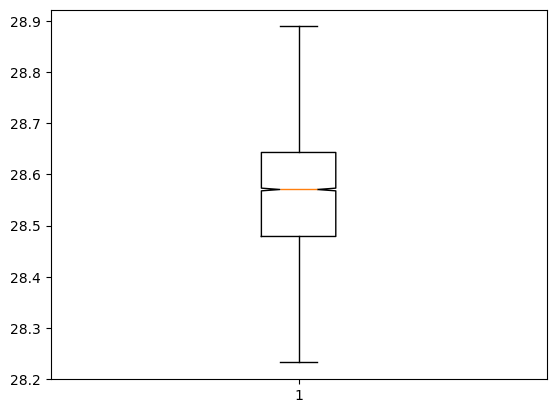

In [83]:
for col in out_feature:
    remove_outliers(col)


In [84]:
x1.skew()

Restaurant Name          0.044755
City                    -1.243427
Address                 -0.040419
Locality                -0.255895
Longitude               -2.807328
Latitude                -0.437305
Cuisines                -0.305498
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

In [85]:
skew_feature=['Average Cost for two','Aggregate rating','Votes','Longitude']

In [86]:
for col in skew_feature:
    x1[col]=x1[col].apply(np.log1p)

In [87]:
x1.skew()

Restaurant Name          0.044755
City                    -1.243427
Address                 -0.040419
Locality                -0.255895
Longitude               -3.698508
Latitude                -0.437305
Cuisines                -0.305498
Average Cost for two    -0.611041
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Aggregate rating        -1.210233
Rating color             0.046009
Rating text              0.431408
Votes                   -0.029507
Country                  3.312721
dtype: float64

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns =x1.columns)

In [89]:
x1

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.045024,-0.218706,1.615727,-1.539983,0.684985,-1.911539,-0.135912,0.965703,-4.351046,2.692181,-0.587547,-0.059771,0.967642,-1.977859,-0.465442,1.188688,0.853457
1,-0.223801,-0.218706,0.590266,-0.204178,0.684877,-1.911539,0.235181,1.045690,-4.351046,2.692181,-0.587547,-0.059771,0.883179,-1.977859,-0.465442,1.498433,0.853457
2,-0.352146,-0.132740,0.055904,-1.106321,0.685219,-1.911539,1.323203,2.152899,-4.351046,2.692181,-0.587547,-0.059771,0.853997,-1.308053,1.895070,1.114826,0.853457
3,0.492132,-0.132740,1.617676,0.647319,0.685216,-1.911539,0.264324,1.250846,-4.351046,-0.371446,-0.587547,-0.059771,0.994828,-1.977859,-0.465442,1.262357,0.853457
4,0.872967,-0.132740,1.617286,0.647319,0.685224,-1.911539,0.256553,1.250846,-4.351046,2.692181,-0.587547,-0.059771,0.967642,-1.977859,-0.465442,1.034294,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.368921,-3.399479,0.540766,-0.438419,-0.685405,2.061496,1.599094,-1.435255,7.681415,-0.371446,-0.587547,-0.059771,0.763095,-1.308053,1.895070,1.639457,2.738952
9547,-1.092348,-3.399479,0.553628,-0.359283,-0.683326,2.061496,1.620466,-1.187765,7.681415,-0.371446,-0.587547,-0.059771,0.793977,-1.308053,1.895070,1.772691,2.738952
9548,-0.271872,-3.399479,0.556357,-0.321298,-0.683542,2.061496,0.233238,-0.747762,7.681415,-0.371446,-0.587547,-0.059771,0.633198,1.371170,0.124686,1.553298,2.738952
9549,-1.657533,-3.399479,0.556747,-0.321298,-0.683497,2.061496,1.296003,-1.065991,7.681415,-0.371446,-0.587547,-0.059771,0.731602,-1.308053,1.895070,1.705167,2.738952


In [90]:
x1.isnull().sum()

Restaurant Name           0
City                      0
Address                   0
Locality                  0
Longitude               558
Latitude                  0
Cuisines                  0
Average Cost for two      0
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
Country                   0
dtype: int64

In [91]:
x1['Longitude']=x1['Longitude'].fillna(x1['Longitude'].mean())

In [92]:
x1.isnull().sum()


Restaurant Name         0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
smt=SMOTE()
x1,y1=smt.fit_resample(x1,y1)


In [95]:
y1.value_counts()

Price range
3    4444
4    4444
2    4444
1    4444
Name: count, dtype: int64

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.011723,Restaurant Name
1,1.122418,City
2,1.172538,Address
3,1.105845,Locality
4,1.185766,Longitude
5,1.348825,Latitude
6,1.050373,Cuisines
7,2.769645,Average Cost for two
8,1.134150,Currency
9,1.629179,Has Table booking


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [98]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    
    
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.9926870429401837 at random state 180


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('accuracy score is :' ,acc)


accuracy score is : 0.9906244140258766


In [101]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(15,10))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.7082317644852804
[[1179  144    5    4]
 [ 118  990  162   70]
 [  49  202  701  385]
 [  43   67  307  907]]
              precision    recall  f1-score   support

           1       0.85      0.89      0.87      1332
           2       0.71      0.74      0.72      1340
           3       0.60      0.52      0.56      1337
           4       0.66      0.69      0.67      1324

    accuracy                           0.71      5333
   macro avg       0.70      0.71      0.71      5333
weighted avg       0.70      0.71      0.71      5333



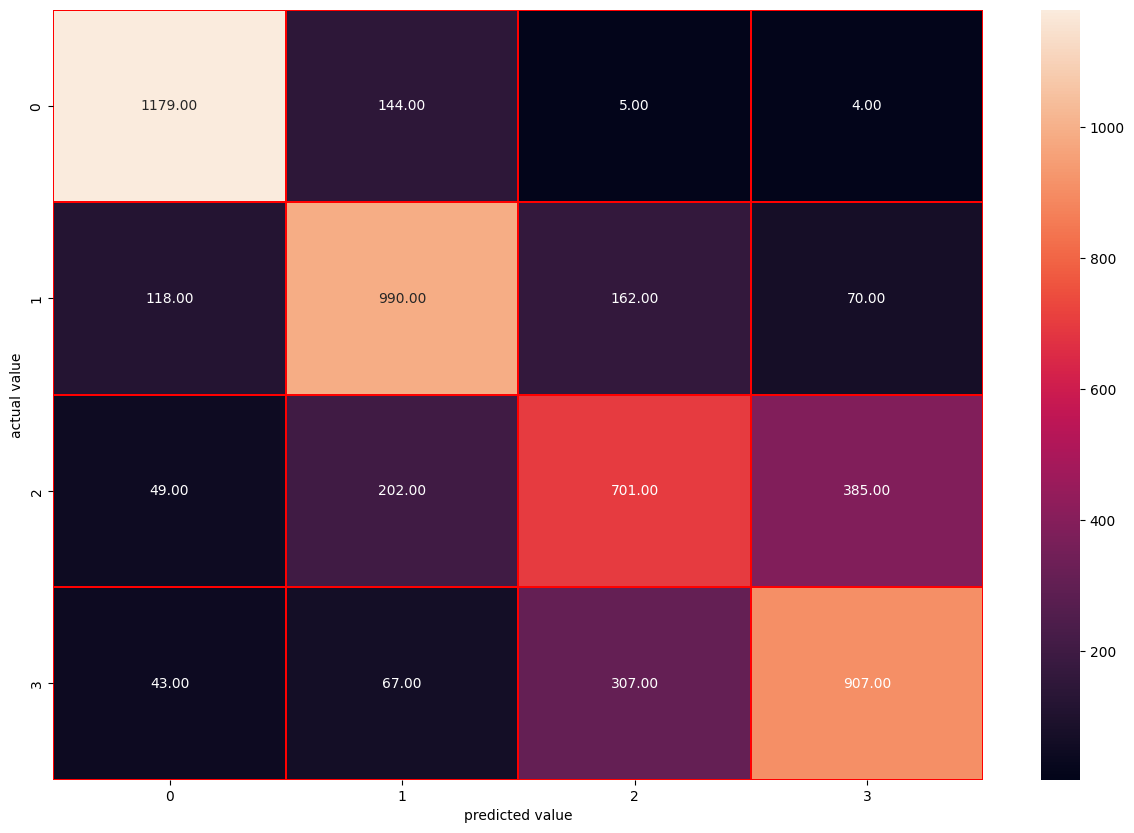

In [102]:
lr=LogisticRegression()
classification_models(lr,x_train,y_train,x_test,y_test)

0.990811925745359
[[1328    4    0    0]
 [   3 1323   14    0]
 [   1    3 1318   15]
 [   0    0    9 1315]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1332
           2       0.99      0.99      0.99      1340
           3       0.98      0.99      0.98      1337
           4       0.99      0.99      0.99      1324

    accuracy                           0.99      5333
   macro avg       0.99      0.99      0.99      5333
weighted avg       0.99      0.99      0.99      5333



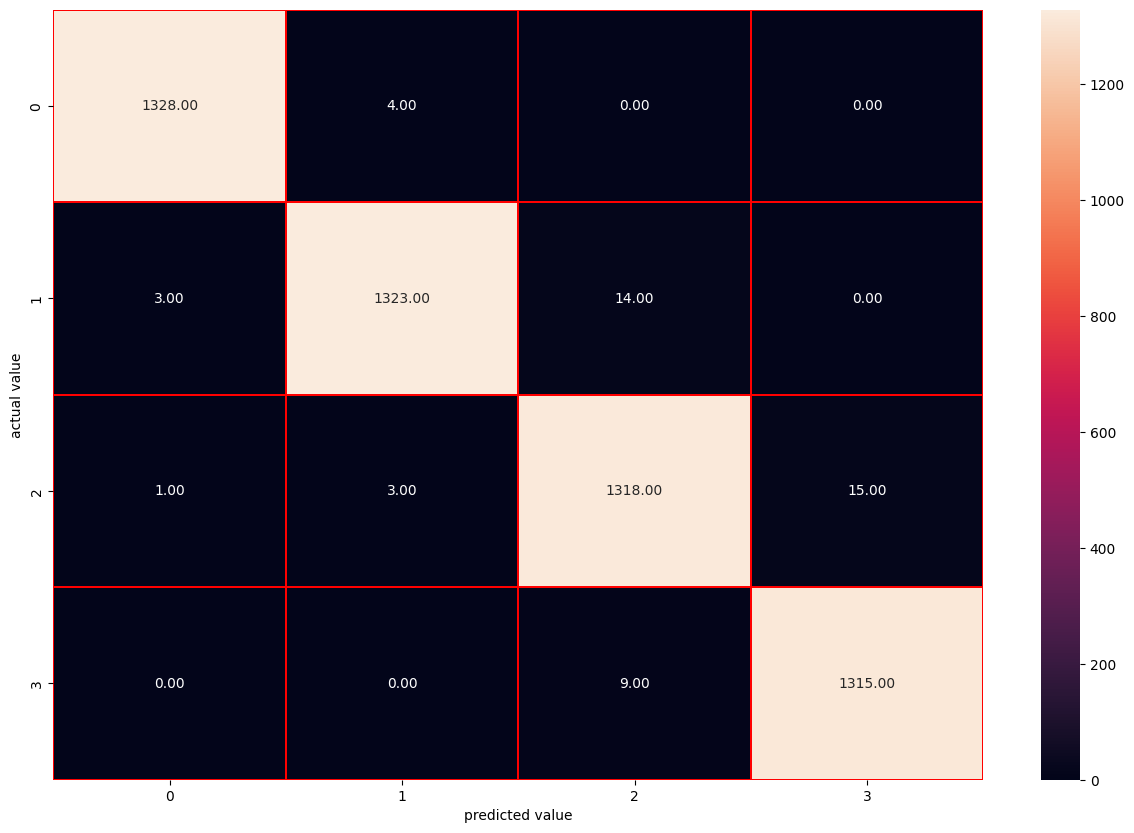

In [103]:
RFC=RandomForestClassifier()
classification_models(RFC,x_train,y_train,x_test,y_test)

0.9458091130695668
[[1284   47    1    0]
 [  10 1238   87    5]
 [   0   19 1248   70]
 [   2    2   46 1274]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      1332
           2       0.95      0.92      0.94      1340
           3       0.90      0.93      0.92      1337
           4       0.94      0.96      0.95      1324

    accuracy                           0.95      5333
   macro avg       0.95      0.95      0.95      5333
weighted avg       0.95      0.95      0.95      5333



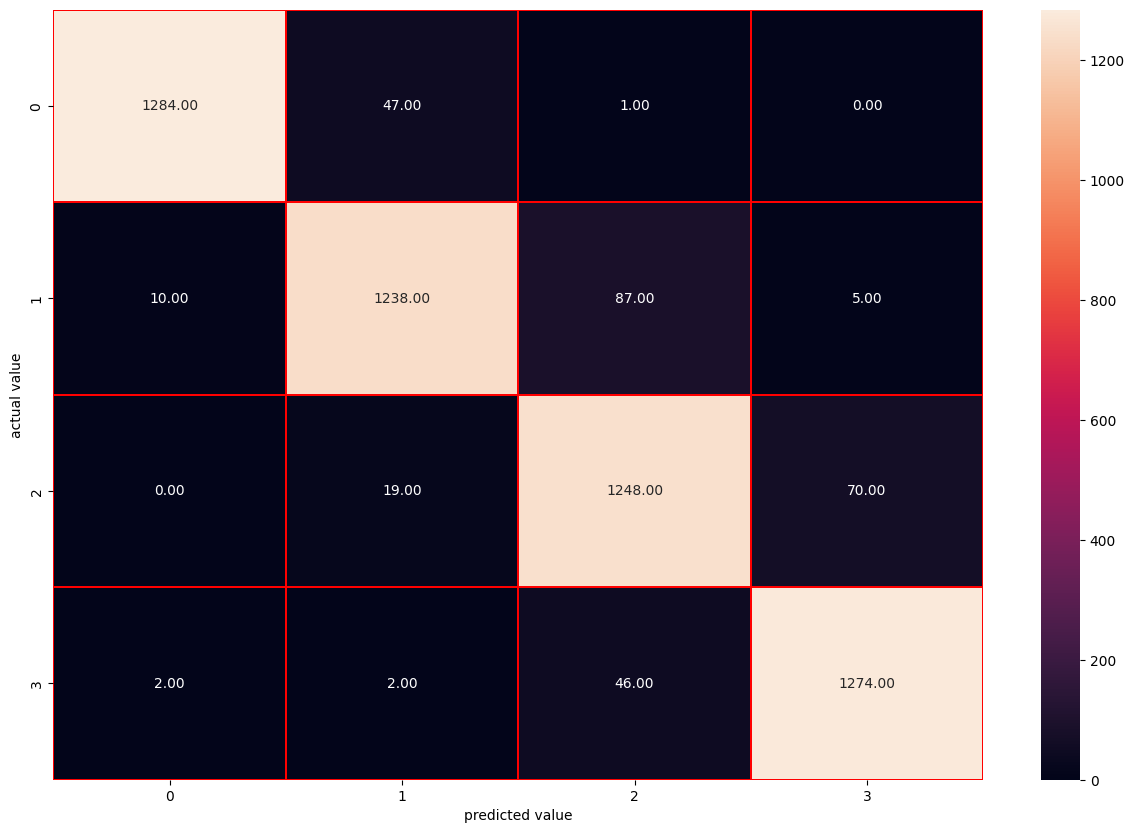

In [104]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)


0.982748921807613
[[1312   17    3    0]
 [   8 1296   34    2]
 [   0   10 1316   11]
 [   0    0    7 1317]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1332
           2       0.98      0.97      0.97      1340
           3       0.97      0.98      0.98      1337
           4       0.99      0.99      0.99      1324

    accuracy                           0.98      5333
   macro avg       0.98      0.98      0.98      5333
weighted avg       0.98      0.98      0.98      5333



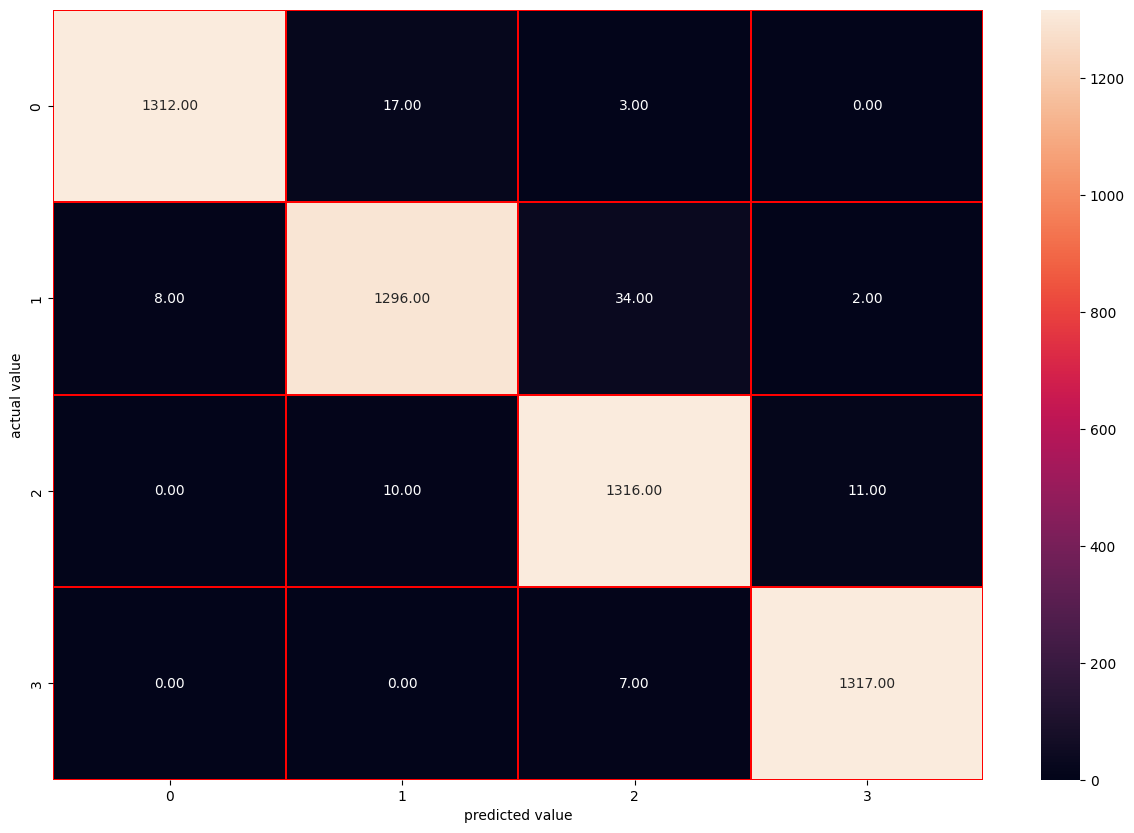

In [105]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)


0.9744984061503844
[[1331    0    1    0]
 [  16 1308   13    3]
 [   0   25 1269   43]
 [   0    0   35 1289]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1332
           2       0.98      0.98      0.98      1340
           3       0.96      0.95      0.96      1337
           4       0.97      0.97      0.97      1324

    accuracy                           0.97      5333
   macro avg       0.97      0.97      0.97      5333
weighted avg       0.97      0.97      0.97      5333



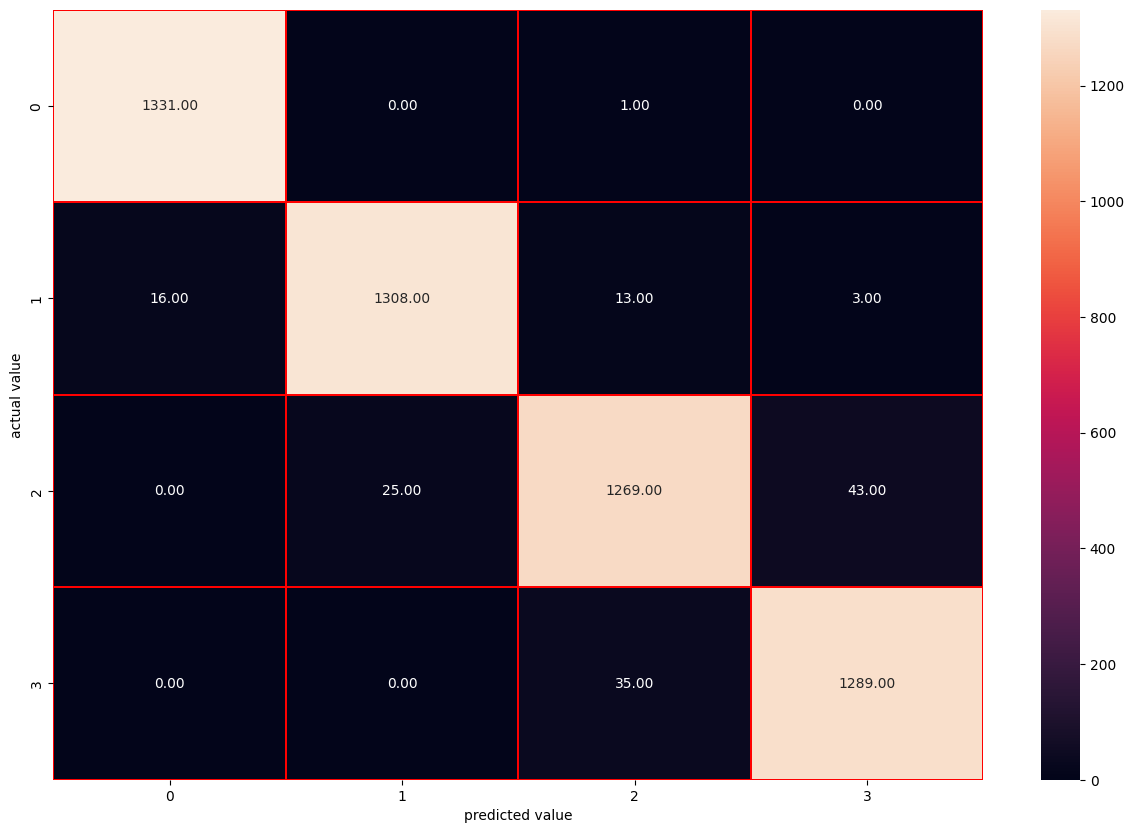

In [106]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.9876242265141572
[[1332    0    0    0]
 [  13 1317   10    0]
 [   1   15 1311   10]
 [   0    0   17 1307]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1332
           2       0.99      0.98      0.99      1340
           3       0.98      0.98      0.98      1337
           4       0.99      0.99      0.99      1324

    accuracy                           0.99      5333
   macro avg       0.99      0.99      0.99      5333
weighted avg       0.99      0.99      0.99      5333



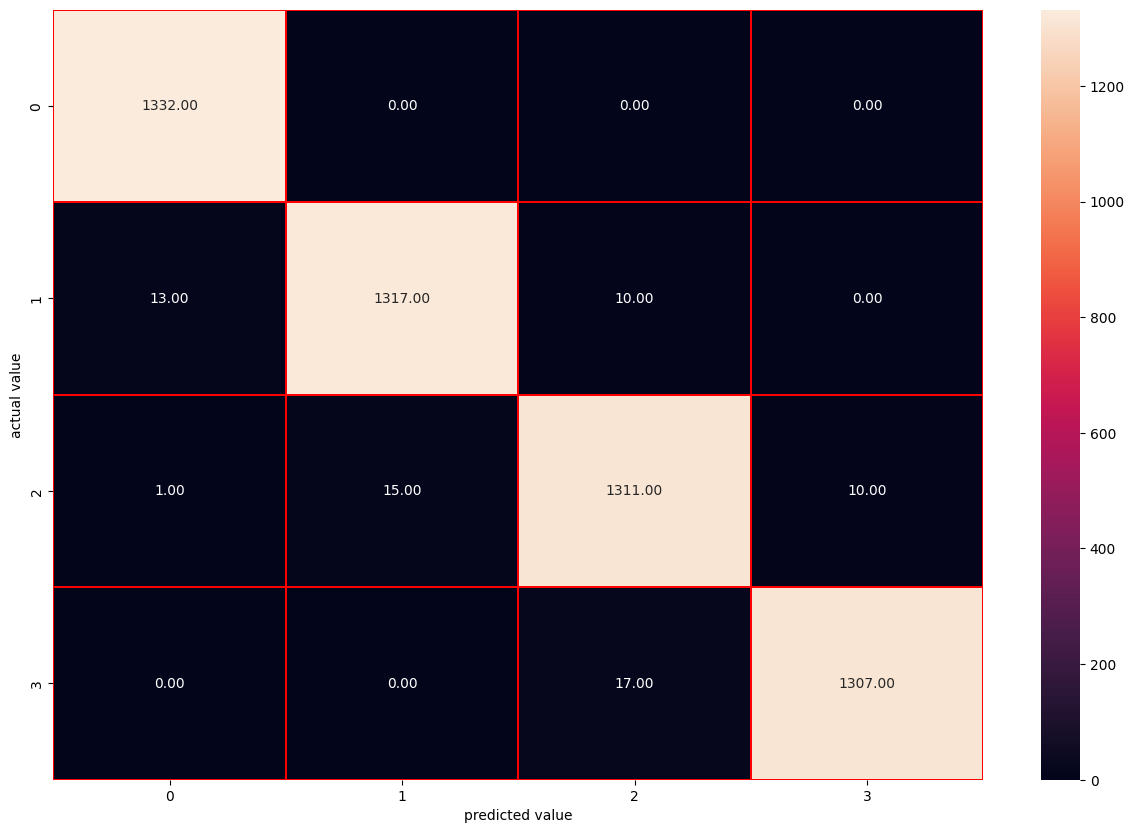

In [107]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.9806862928933058
[[1331    1    0    0]
 [  11 1311   18    0]
 [   0   21 1288   28]
 [   0    0   24 1300]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1332
           2       0.98      0.98      0.98      1340
           3       0.97      0.96      0.97      1337
           4       0.98      0.98      0.98      1324

    accuracy                           0.98      5333
   macro avg       0.98      0.98      0.98      5333
weighted avg       0.98      0.98      0.98      5333



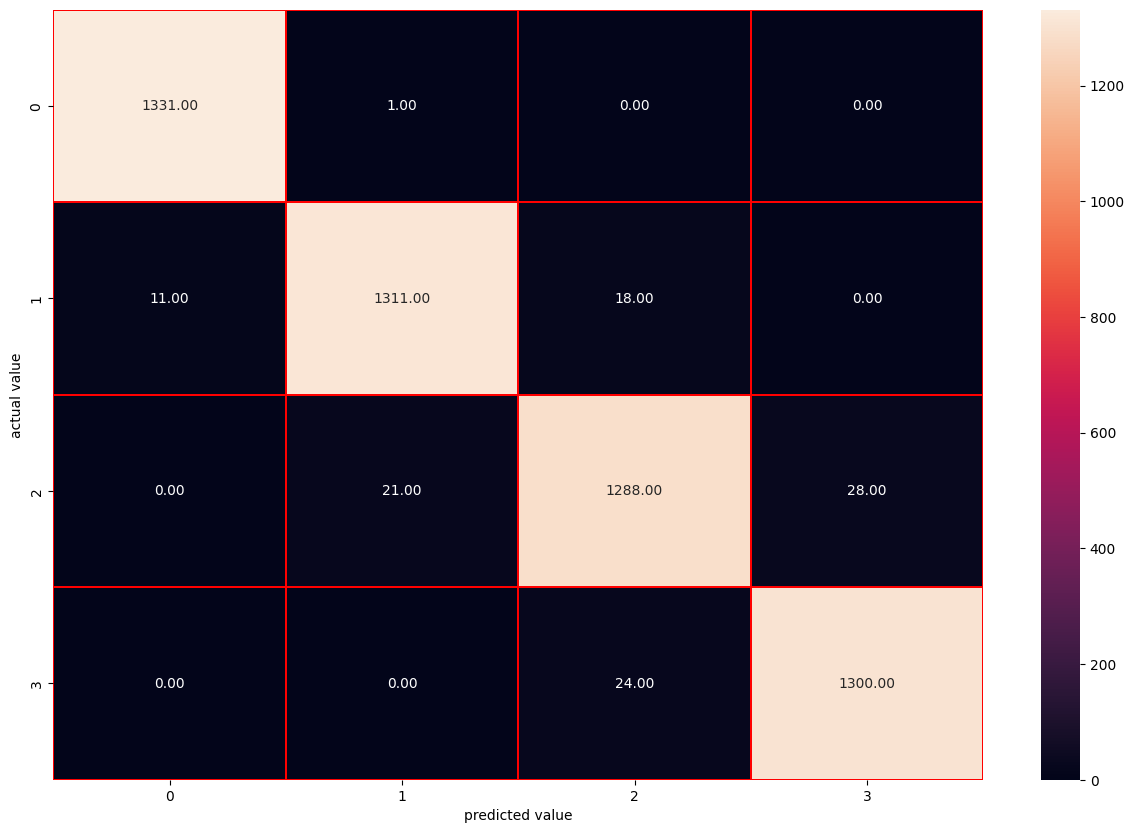

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [109]:
def cross_validation(model,x1,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [110]:
cross_validation(lr,x1,y1,x_test)


[0.53908886 0.67482419 0.71054852 0.71026723 0.69507736]
0.6659612326940145
differnce between accuracy score and cross validation is 0.04227053179126583


In [111]:
cross_validation(svc,x1,y1,x_test)



[0.79105737 0.93333333 0.95583685 0.93558368 0.93699015]
0.9105602780665075
differnce between accuracy score and cross validation is 0.03524883500305931


In [112]:
cross_validation(etc,x1,y1,x_test)


[0.75253093 0.96315049 0.98030942 0.96652602 0.92658228]
0.9178198294833401
differnce between accuracy score and cross validation is 0.06492909232427291


In [113]:
cross_validation(gbc,x1,y1,x_test)


[0.9091676  0.96455696 0.98509142 0.95724332 0.97440225]
0.9580923112459043
differnce between accuracy score and cross validation is 0.016406094904480084


In [114]:
cross_validation(bgc,x1,y1,x_test)


[0.79021372 0.97834037 0.99324895 0.97468354 0.98452883]
0.9442030822096605
differnce between accuracy score and cross validation is 0.04342114430449662


In [116]:
cross_validation(RFC,x1,y1,x_test)


[0.9091676  0.98649789 0.99634318 0.97412096 0.98874824]
0.9709755742557498
differnce between accuracy score and cross validation is 0.019836351489609272


In [ ]:
#From the above cross validation score of the above algorithm i have selected GradientBoostingClassifier as my final model 
Accuracy score for GradientBoostingClassifier is 0.9709356834802175

[0.9091676  0.96455696 0.98509142 0.95724332 0.97440225]
0.9580923112459043
differnce between accuracy score and cross validation is 0.016406094904480084

In [118]:
final_model_classification=GradientBoostingClassifier()
final_model_classification.fit(x_train,y_train)
pred=final_model_classification.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
score=cross_val_score(final_model_classification,x1,y1,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.9746859178698669
[0.90860517 0.96455696 0.98509142 0.95724332 0.97440225]
95.79798253066467
difference between r2 score and cross validation score is  1.6706092563220198


In [122]:
import joblib

In [123]:
joblib.dump(final_model_classification,'Zomato_Restaurantclassification.pkl')

['Zomato_Restaurantclassification.pkl']

In [124]:
final_model=joblib.load('Zomato_Restaurantclassification.pkl')

In [125]:
df=pd.DataFrame()
prediction=final_model.predict(x_test)

In [126]:
dummy_test=np.array(y_test)

In [127]:
df['orignal']=dummy_test
df['prediction']=prediction
df

,orignal,prediction
0,1,1
1,2,2
2,3,3
3,4,4
4,4,4
...,...,...
5328,3,3
5329,1,1
5330,4,4
5331,2,2
